# SHIPMENTSURE: Predicting On-Time Delivery Using Supplier Data


###  Data Collection and Preparation

In [ ]:
import pandas as pd

# Load the dataset 
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Show first 5 rows
df.head()


In [5]:
#  show last 5 rows
df.tail()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [6]:

df.sort_values(by="ID", ascending=False)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
print(df.shape)


(10999, 12)


In [9]:
# Find the 10 orders with the highest product cost.
df.sort_values(by="Cost_of_the_Product", ascending=False).head(10)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6316,6317,C,Flight,7,3,310,4,medium,F,8,1497,0
9699,9700,B,Ship,6,3,310,5,low,M,6,1139,0
4551,4552,B,Ship,6,2,310,4,medium,F,5,1791,1
10194,10195,D,Ship,6,4,310,4,medium,M,1,1494,1
4819,4820,F,Ship,6,5,310,4,medium,M,1,1105,1
5040,5041,D,Ship,7,3,310,4,medium,F,7,1989,0
5258,5259,A,Ship,7,3,310,4,medium,M,8,1860,1
6599,6600,F,Ship,7,3,310,5,low,F,5,1563,0
5255,5256,F,Ship,7,2,310,4,low,M,4,1806,0
5024,5025,A,Ship,7,2,310,4,low,F,7,1294,0


In [10]:
df[df["Customer_rating"] >= 5]


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
12,13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1
10966,10967,C,Flight,5,5,246,5,low,F,6,1300,0
10971,10972,B,Flight,5,5,221,5,low,M,8,1718,0
10986,10987,D,Ship,4,5,255,5,medium,M,5,1458,1


In [12]:
# Select shipments with cost > 200(filtering condition)
df[df["Cost_of_the_Product"] > 200].head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
13,14,F,Flight,4,4,275,3,high,M,29,2602,1


In [13]:
# Multiple Conditions (OR |) Cost > 400 or Discount > 50
df[(df["Cost_of_the_Product"] > 400) | (df["Discount_offered"] > 50)].head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
21,22,B,Ship,3,1,232,4,medium,F,51,2899,1
31,32,F,Ship,5,3,257,2,low,F,61,3341,1
36,37,D,Ship,3,5,137,4,high,F,62,1477,1
38,39,A,Ship,5,1,215,4,low,F,56,3905,1


In [14]:
# Filtering with isin()  Select shipments from Warehouse A or B      (filter rows based on multiple values in a column)(It’s a cleaner way to check if a value belongs to a list, instead of writing many OR conditions.)
df[df["Warehouse_block"].isin(["A","B"])].head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1
14,15,A,Flight,4,3,152,3,low,M,43,1009,1


In [15]:
# Filtering with between()    Select shipments with cost between 100 and 300
df[df["Cost_of_the_Product"].between(100,300)].head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [16]:
# Find all the customers who purchased a product costing more than 200 and gave a 5-star rating
df[(df["Cost_of_the_Product"] > 200) & (df["Customer_rating"] == 5)]


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
24,25,D,Ship,4,5,251,2,medium,F,28,3561,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10928,10929,A,Ship,3,5,278,4,medium,F,8,1785,0
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1
10966,10967,C,Flight,5,5,246,5,low,F,6,1300,0
10971,10972,B,Flight,5,5,221,5,low,M,8,1718,0


In [17]:
# finds the average product price per warehouse block.
df.groupby("Warehouse_block")["Cost_of_the_Product"].mean()


Warehouse_block
A    208.767594
B    212.159302
C    211.191489
D    210.907852
F    209.077196
Name: Cost_of_the_Product, dtype: float64

In [18]:
# finds the warehouse blocks whose average product cost is more than 200.   (to turn the grouped index back into a column so the result looks like a clean table)
grouped = df.groupby("Warehouse_block")["Cost_of_the_Product"].mean().reset_index()     
grouped[grouped["Cost_of_the_Product"] > 200]

,Warehouse_block,Cost_of_the_Product
0,A,208.767594
1,B,212.159302
2,C,211.191489
3,D,210.907852
4,F,209.077196


In [23]:
# Classify each product as Expensive or Cheap based on whether its cost is greater than 200 or not
df["Cost_Label"] = df["Cost_of_the_Product"].map(lambda x: "Expensive" if x > 200 else "Cheap")
df[["Cost_of_the_Product", "Cost_Label"]].head(20)


,Cost_of_the_Product,Cost_Label
0,177,Cheap
1,216,Expensive
2,183,Cheap
3,176,Cheap
4,184,Cheap
5,162,Cheap
6,250,Expensive
7,233,Expensive
8,150,Cheap
9,164,Cheap


In [24]:
# Find all customers who were offered a discount greater than 20 and gave a rating of 4 or above
filtered_lambda = df[df.apply(lambda row: row["Discount_offered"] > 20 and row["Customer_rating"] >= 4, axis=1)]
filtered_lambda.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_Label
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Expensive
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1,Expensive
13,14,F,Flight,4,4,275,3,high,M,29,2602,1,Expensive
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1,Expensive
19,20,F,Ship,4,5,145,3,medium,M,45,1059,1,Cheap


In [25]:
# Find all warehouse blocks where the average product cost is greater than 200 using filter
# Step 1: Group by warehouse and get average cost
grouped = df.groupby("Warehouse_block")["Cost_of_the_Product"].mean().reset_index()

# Step 2: Use filter with lambda
high_cost_blocks = list(filter(lambda x: x[1] > 200, grouped.values.tolist()))

print(high_cost_blocks)


[['A', 208.76759410801964], ['B', 212.1593016912166], ['C', 211.19148936170214], ['D', 210.90785169029445], ['F', 209.0771958537916]]


In [27]:
# Classify customers as Loyal (more than 5 purchases), New (2 or fewer purchases), or Regular (others)
df["Customer_Type"] = df["Prior_purchases"].map(lambda x: "Loyal" if x > 5 else ("New" if x <= 2 else "Regular"))
df[["Prior_purchases", "Customer_Type"]]


,Prior_purchases,Customer_Type
0,3,Regular
1,2,New
2,4,Regular
3,4,Regular
4,3,Regular
...,...,...
10994,5,Regular
10995,5,Regular
10996,5,Regular
10997,6,Loyal


In [28]:
# Replace the customer rating 1 with 'Very Poor' and rating 5 with 'Excellent'
df["Rating_Label"] = df["Customer_rating"].replace({1: "Very Poor", 5: "Excellent"})
print(df[["Customer_rating", "Rating_Label"]].head(20))


   Customer_rating Rating_Label
0                2            2
1                5    Excellent
2                2            2
3                3            3
4                2            2


In [3]:
import pandas as pd

# Load the dataset (give correct path)
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Show first 5 rows
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Exploratory Data Analysis(EDA)

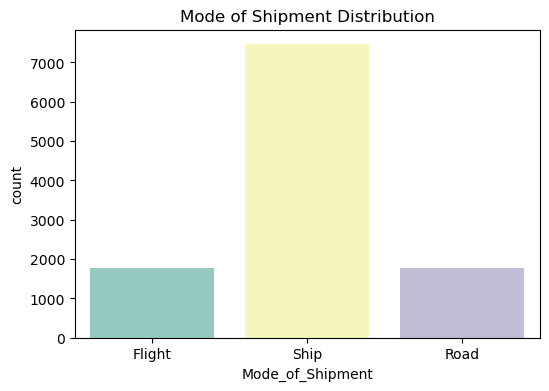

In [7]:
# A bar chart where Each bar shows one shipment mode (Flight, Ship, Road, etc.).
plt.figure(figsize=(6,4))
sns.countplot(x="Mode_of_Shipment", data=df, palette="Set3")
plt.title("Mode of Shipment Distribution")
plt.show()


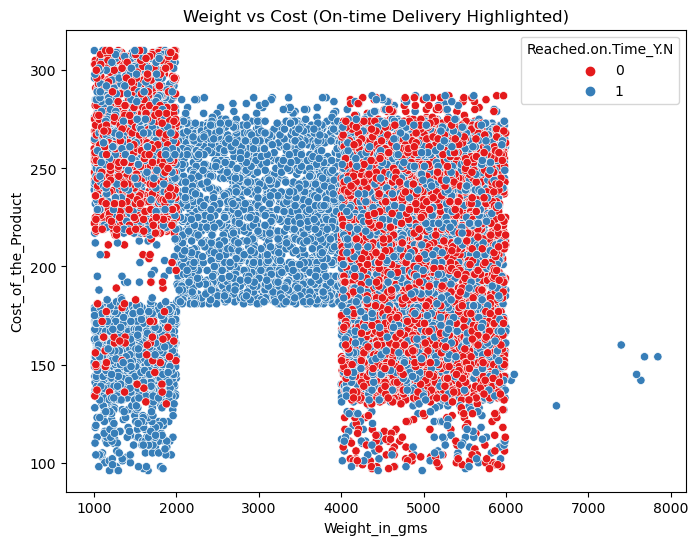

In [11]:
# This scatter plot compares weight vs cost of products that is delievring on time or not
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Weight_in_gms',
    y='Cost_of_the_Product',
    data=df,
    hue='Reached.on.Time_Y.N',
    palette='Set1'
)
plt.title("Weight vs Cost (On-time Delivery Highlighted)")
plt.show()


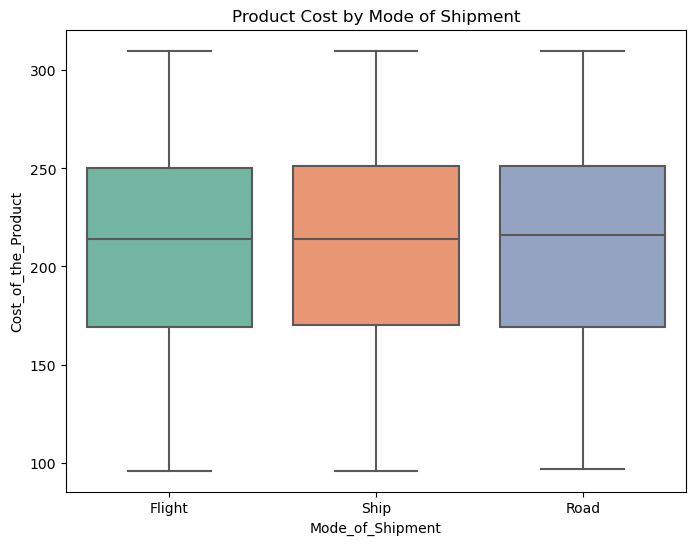

In [12]:
# Box plot for the mode of shipment
plt.figure(figsize=(8,6))
sns.boxplot(x="Mode_of_Shipment", y="Cost_of_the_Product", data=df, palette="Set2")
plt.title("Product Cost by Mode of Shipment")
plt.show()


###    Univariate Analysis

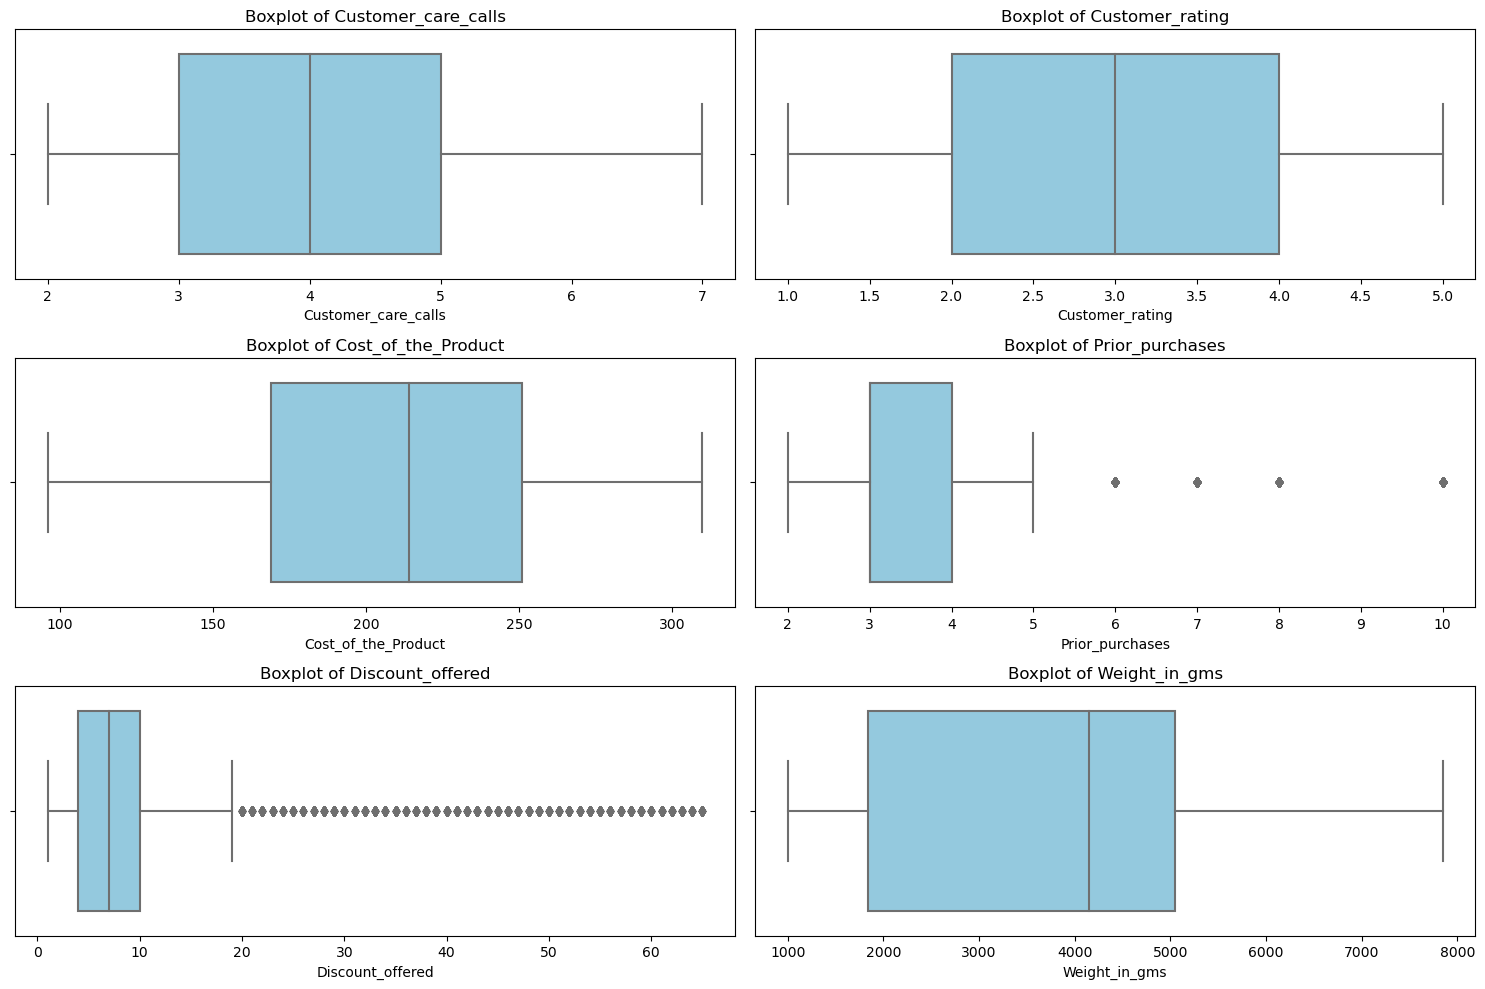

In [6]:
# ------------------ Univariate Boxplots ------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Numeric columns
num_cols = [
    'Customer_care_calls', 'Customer_rating',
    'Cost_of_the_Product', 'Prior_purchases',
    'Discount_offered', 'Weight_in_gms'
]

# Plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


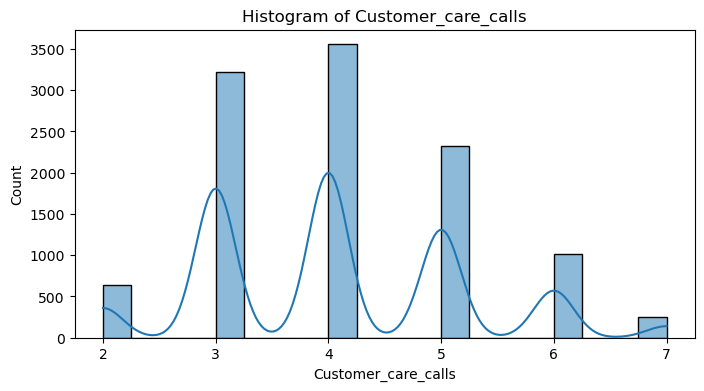

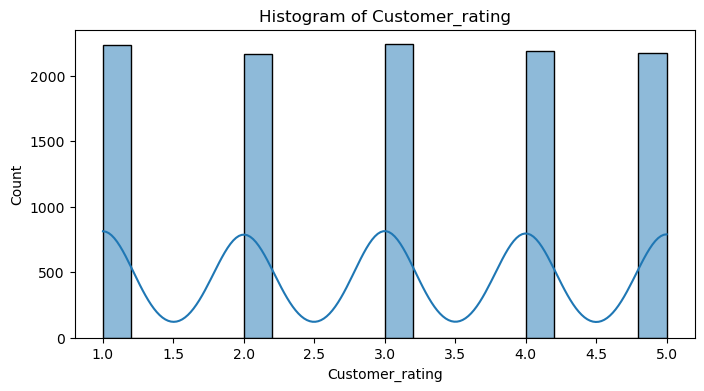

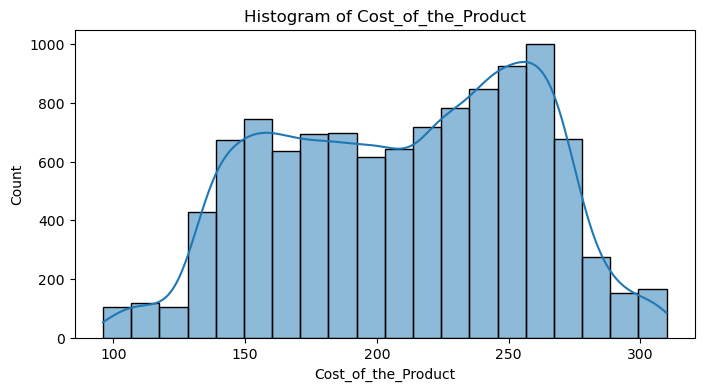

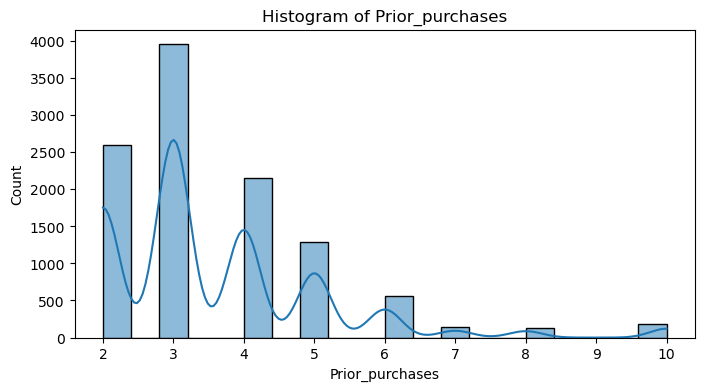

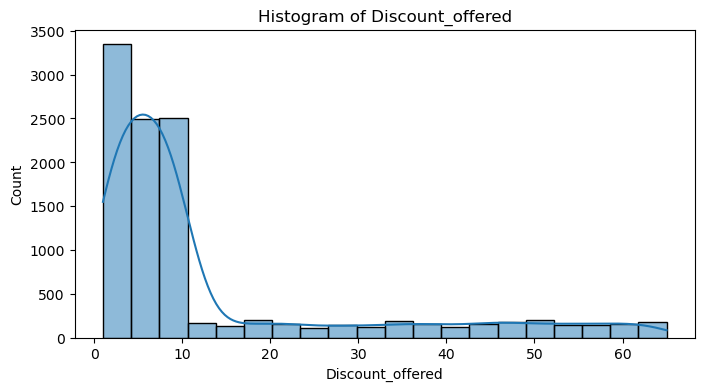

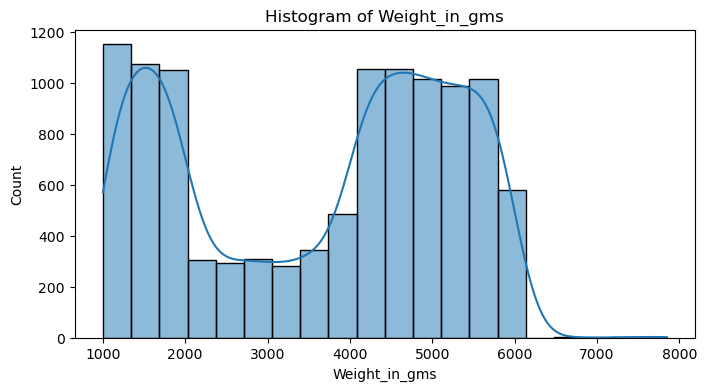

In [7]:
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

### Bivariate Analysis

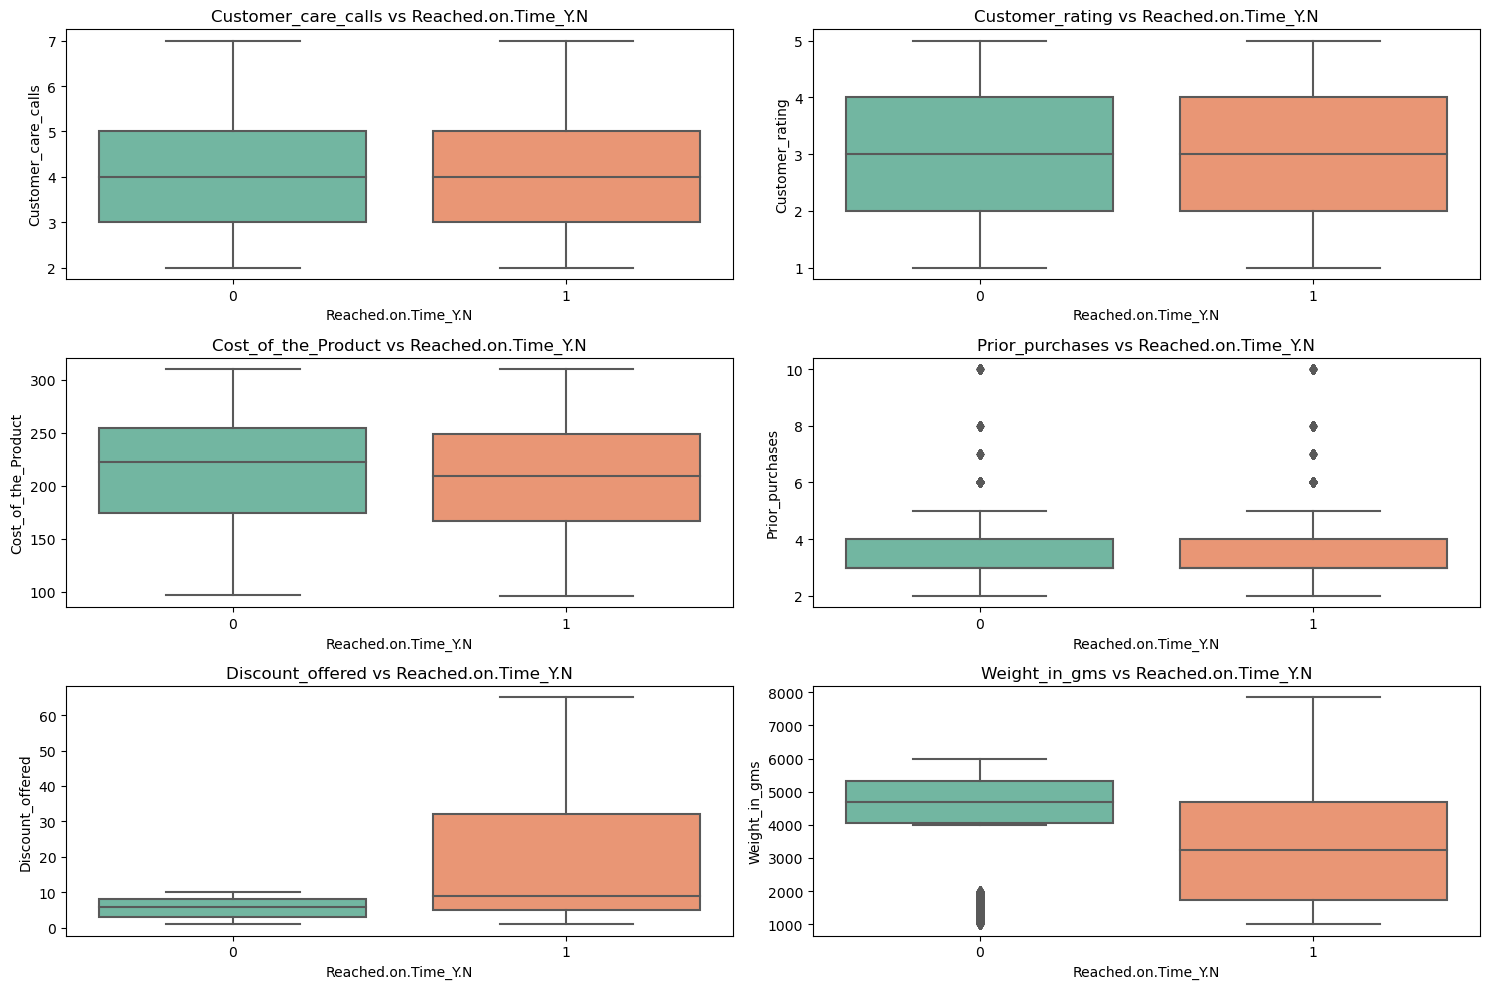

In [8]:
# ------------------ Bivariate Boxplots ------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Reached.on.Time_Y.N")
plt.tight_layout()
plt.show()


Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


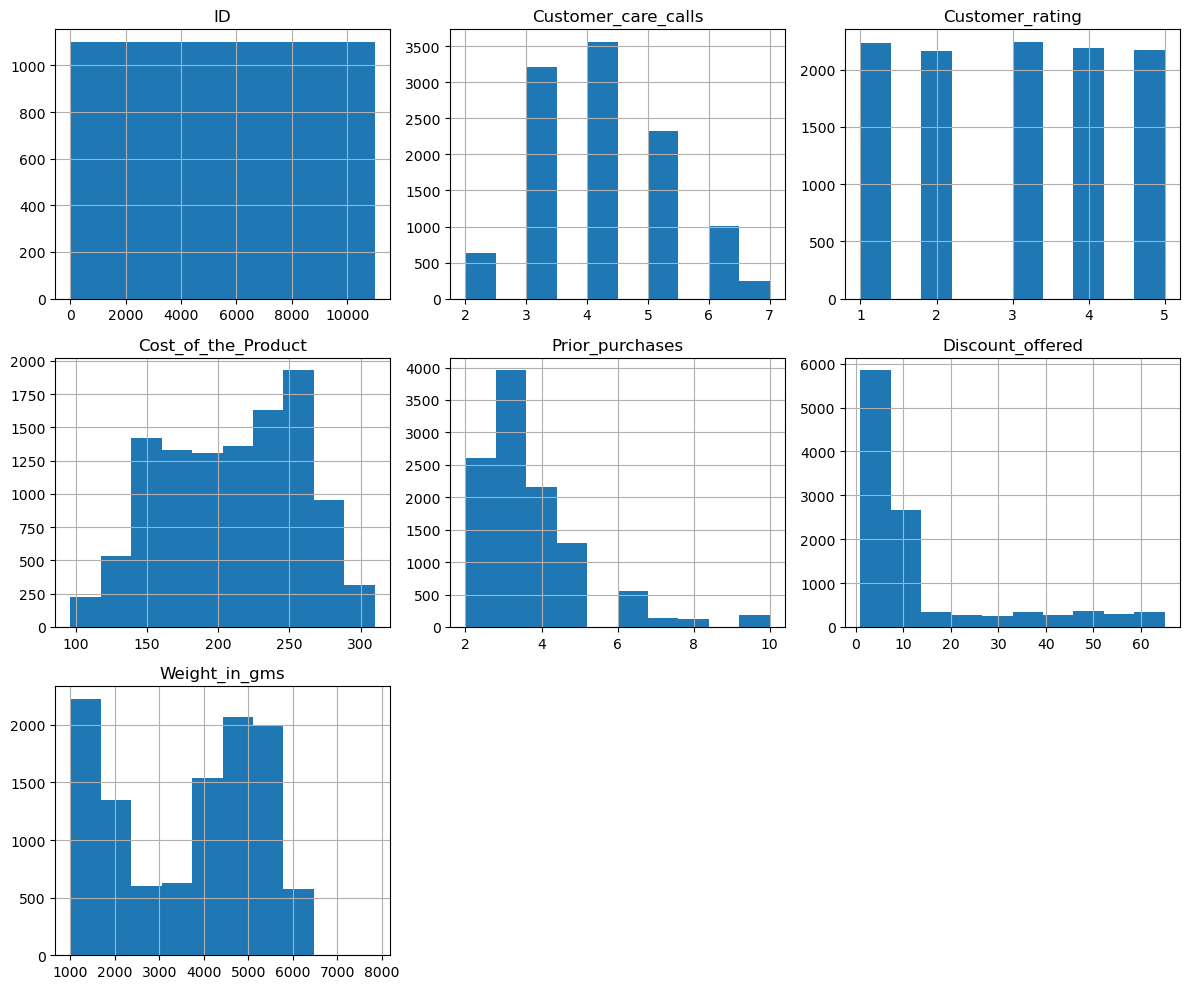

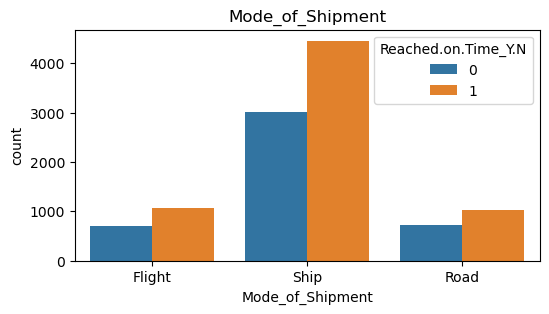

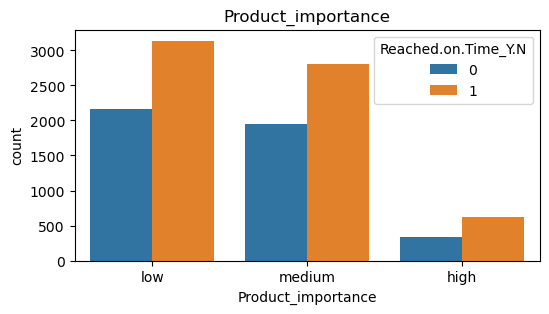

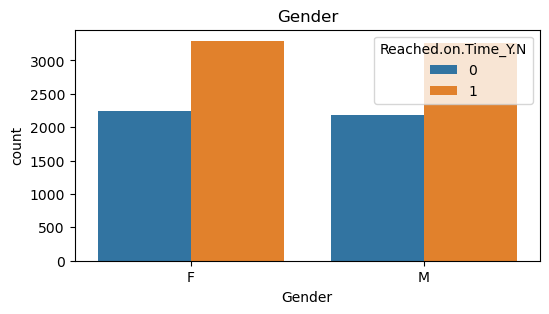

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'Reached.on.Time_Y.N'
print(df[target].value_counts(normalize=True))
# histogram of a numeric column
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target]
df[numeric_cols].hist(figsize=(12,10))
plt.tight_layout()

# categorical counts
for cat in ['Mode_of_Shipment','Product_importance','Gender']:
    if cat in df.columns:
        plt.figure(figsize=(6,3))
        sns.countplot(x=cat, hue=target, data=df)
        plt.title(cat)


In [22]:
# find the minimum, maximum, standard deviation, and variance of all numeric features
# Minimum values
print("🔹 Minimum values:")
print(df.min(numeric_only=True))
print("\n")

# Maximum values
print("🔹 Maximum values:")
print(df.max(numeric_only=True))
print("\n")

# Standard Deviation
print("🔹 Standard Deviation:")
print(df.std(numeric_only=True))
print("\n")

# Variance
print("🔹 Variance:")
print(df.var(numeric_only=True))


🔹 Minimum values:
ID                        1
Customer_care_calls       2
Customer_rating           1
Cost_of_the_Product      96
Prior_purchases           2
Discount_offered          1
Weight_in_gms          1001
Reached.on.Time_Y.N       0
dtype: int64


🔹 Maximum values:
ID                     10999
Customer_care_calls        7
Customer_rating            5
Cost_of_the_Product      310
Prior_purchases           10
Discount_offered          65
Weight_in_gms           7846
Reached.on.Time_Y.N        1
dtype: int64


🔹 Standard Deviation:
ID                     3175.282140
Customer_care_calls       1.141490
Customer_rating           1.413603
Cost_of_the_Product      48.063272
Prior_purchases           1.522860
Discount_offered         16.205527
Weight_in_gms          1635.377251
Reached.on.Time_Y.N       0.490584
dtype: float64


🔹 Variance:
ID                     1.008242e+07
Customer_care_calls    1.302999e+00
Customer_rating        1.998274e+00
Cost_of_the_Product    2.310078e+03
Pri

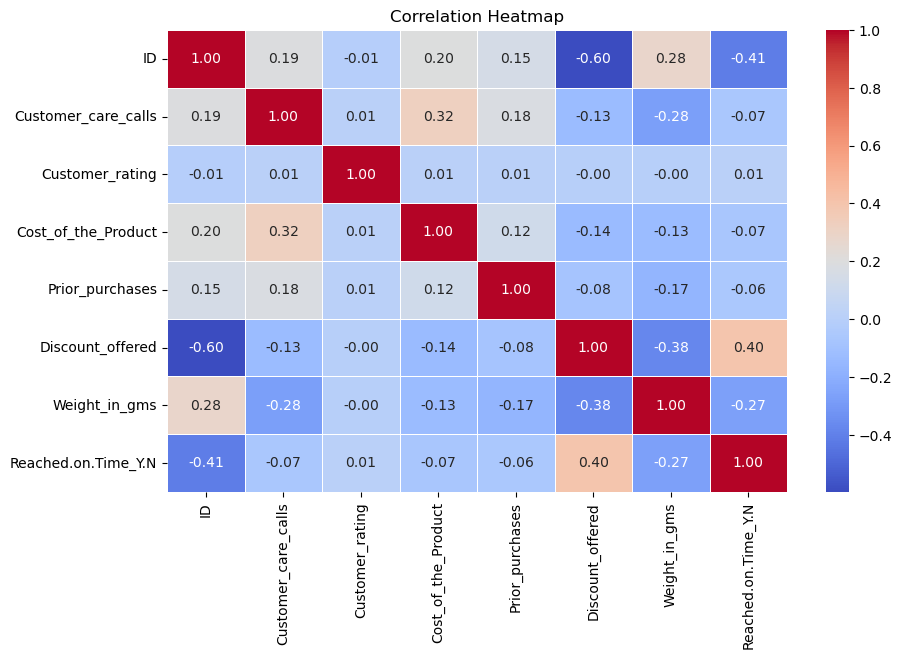

In [17]:
# Computes the correlation matrix for all numeric columns.
# Correlation values range from -1 to +1:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [20]:
#  Calculates covariance matrix for all numeric columns in your dataset.
df.cov(numeric_only=True)


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.008242e+07,685.034279,-25.684852,30033.202582,702.932351,-30785.664030,1.445213e+06,-641.513639
Customer_care_calls,6.850343e+02,1.302999,0.019700,17.730960,0.314240,-2.418672,-5.163759e+02,-0.037590
Customer_rating,-2.568485e+01,0.019700,1.998274,0.629794,0.028372,-0.071575,-4.385094e+00,0.009098
Cost_of_the_Product,3.003320e+04,17.730960,0.629794,2310.078091,9.052296,-107.729679,-1.042289e+04,-1.735119
Prior_purchases,7.029324e+02,0.314240,0.028372,9.052296,2.319103,-2.042643,-4.189264e+02,-0.041475
Discount_offered,-3.078566e+04,-2.418672,-0.071575,-107.729679,-2.042643,262.619108,-9.966577e+03,3.157082
Weight_in_gms,1.445213e+06,-516.375888,-4.385094,-10422.887818,-418.926390,-9966.576620,2.674459e+06,-215.649645
Reached.on.Time_Y.N,-6.415136e+02,-0.037590,0.009098,-1.735119,-0.041475,3.157082,-2.156496e+02,0.240673


###  Handling Outliers

In [26]:
# finds outliers in numeric columns using the IQR rule and prints how many outliers exist in each column
import pandas as pd
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Detect outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print("Outliers found in dataset:\n", outliers.sum())


Outliers found in dataset:
 ID                        0
Customer_care_calls       0
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases        1003
Discount_offered       2209
Weight_in_gms             0
Reached.on.Time_Y.N       0
dtype: int64


In [3]:
# shows how many missing values are in each column.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
print(df.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


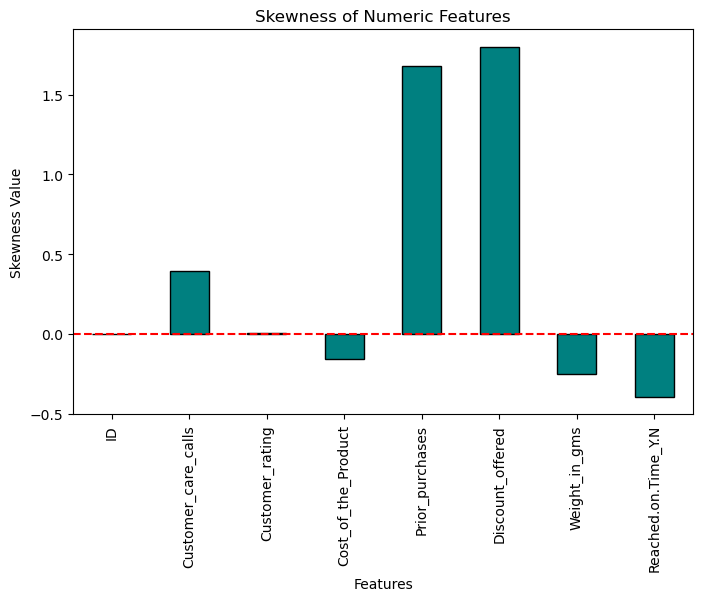

In [6]:
import matplotlib.pyplot as plt

# Calculate skewness for numeric columns
skew_values = df.skew(numeric_only=True)

# Plot skewness
plt.figure(figsize=(8,5))
skew_values.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Skewness of Numeric Features")
plt.xlabel("Features")
plt.ylabel("Skewness Value")
plt.axhline(0, color='red', linestyle='--')  # reference line at 0
plt.show()


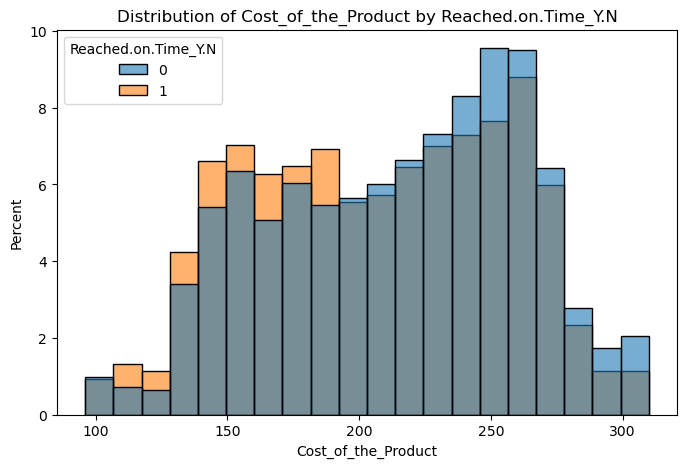

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Set the column you want to plot
col = "Cost_of_the_Product"        
output_col = "Reached.on.Time_Y.N" 

# Plot
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x=col,
    hue=output_col,
    bins=20,
    stat='percent',
    common_norm=False,
    alpha=0.6,
    kde=False
)
plt.title(f"Distribution of {col} by {output_col}")
plt.show()


In [6]:
#  ---------------FEATURE ENGINEERING------------------------

# it creates new features from existing numeric columns.
#  It adds the square of each feature and an interaction term   (square of cost),  (square of discount)   and interaction between the cost and discount
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Select numeric features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["Cost_of_the_Product", "Discount_offered"]])

# Use the exact column names from df
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(["Cost_of_the_Product", "Discount_offered"]))

# Add new polynomial features to df
df = pd.concat([df, poly_df], axis=1)
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product,Discount_offered,Cost_of_the_Product^2,Cost_of_the_Product Discount_offered,Discount_offered^2
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,177.0,44.0,31329.0,7788.0,1936.0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,216.0,59.0,46656.0,12744.0,3481.0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,183.0,48.0,33489.0,8784.0,2304.0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,176.0,10.0,30976.0,1760.0,100.0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,184.0,46.0,33856.0,8464.0,2116.0


In [12]:
# Two types of scaling are used here:
# Standardization → makes the data have mean = 0 and standard deviation = 1.
# Normalization → scales the data to a fixed range (0–1).

from sklearn.preprocessing import StandardScaler, MinMaxScaler

df["Cost_scaled"] = StandardScaler().fit_transform(df[["Cost_of_the_Product"]])

df["Discount_normalized"] = MinMaxScaler().fit_transform(df[["Discount_offered"]])
print(df[["Cost_of_the_Product", "Cost_scaled", "Discount_offered", "Discount_normalized"]].head())

# Cost_of_the_Product is standardized to mean 0 and std 1
# Discount_offered is normalized to  0–1 range

# Cost_scaled → negative means below average,   positive above average.
# Discount_normalized → scaled between 0 and 1

   Cost_of_the_Product  Cost_scaled  Discount_offered  Discount_normalized
0                  177    -0.690722                44             0.671875
1                  216     0.120746                59             0.906250
2                  183    -0.565881                48             0.734375
3                  176    -0.711529                10             0.140625
4                  184    -0.545074                46             0.703125


In [13]:
# creates two new features: Weight_per_Cost and Discount value
# Weight_per_Cost shows grams per unit cost
# Discount_Value shows the actual money saved from the discount.

df["Weight_per_Cost"] = df["Weight_in_gms"] / df["Cost_of_the_Product"]
df["Discount_Value"] = df["Cost_of_the_Product"] * (df["Discount_offered"] / 100)
print(df[["Weight_per_Cost", "Discount_Value"]].head())


   Weight_per_Cost  Discount_Value
0         6.966102           77.88
1        14.296296          127.44
2        18.437158           87.84
3         6.687500           17.60
4        13.500000           84.64


In [14]:
# counts how many times each warehouse block appears
freq_encoding = df["Warehouse_block"].value_counts().to_dict()
df["Warehouse_freq"] = df["Warehouse_block"].map(freq_encoding)
print(df[["Warehouse_block", "Warehouse_freq"]].head())


  Warehouse_block  Warehouse_freq
0               D            1834
1               F            3666
2               A            1833
3               B            1833
4               C            1833


In [17]:
# performs feature selection using the Chi-Square test.
# It identifies which numeric features are most related to the target (Reached.on.Time_Y.N).
# Only the top 5 features with the strongest relationship are selected.

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Define target column
y = df["Reached.on.Time_Y.N"]   

# Keep only numeric features (exclude target)
X_numeric = df.select_dtypes(include="number").drop("Reached.on.Time_Y.N", axis=1)

# Apply chi-square test (top 5 features)
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_new = chi2_selector.fit_transform(X_numeric, y)

print("Selected features (Chi-Square):", X_numeric.columns[chi2_selector.get_support()])


Selected features (Chi-Square): Index(['ID', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered',
       'Weight_in_gms'],
      dtype='object')


In [2]:

import pandas as pd
from sklearn.feature_selection import chi2

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Target column
y = df['Reached.on.Time_Y.N']

# Select only categorical columns (object or category type)
df_cat = df.select_dtypes(include=['object', 'category'])

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(df_cat, drop_first=True)

# Apply Chi-Square test
chi_scores, p_values = chi2(X, y)

# Print results
for feature, score, p in zip(X.columns, chi_scores, p_values):
    print(f"Feature: {feature}, Chi2 Score: {score:.2f}, p-value: {p:.4f}")


Feature: Warehouse_block_B, Chi2 Score: 0.24, p-value: 0.6250
Feature: Warehouse_block_C, Chi2 Score: 0.00, p-value: 0.9899
Feature: Warehouse_block_D, Chi2 Score: 0.01, p-value: 0.9367
Feature: Warehouse_block_F, Chi2 Score: 0.05, p-value: 0.8259
Feature: Mode_of_Shipment_Road, Chi2 Score: 0.54, p-value: 0.4609
Feature: Mode_of_Shipment_Ship, Chi2 Score: 0.02, p-value: 0.8782
Feature: Product_importance_low, Chi2 Score: 0.34, p-value: 0.5626
Feature: Product_importance_medium, Chi2 Score: 0.77, p-value: 0.3804
Feature: Gender_M, Chi2 Score: 0.12, p-value: 0.7270


In [18]:
# -------------------RFE(RECURSIVE FEATURE ENGINEERING)-------------------------------

# feature selection using RFE (Recursive Feature Elimination)
# RFE works by fitting a model repeatedly, ranking features, and eliminating the least important ones in each iteration.
#  FEATURE RANKING : Ranking shows which features were considered more important for the model and which were less important.
# 1 → selected feature (most important, kept in the final set).
# 2, 3, … → less important (eliminated by RFE).

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_numeric, y)

print("Selected features (RFE):", X_numeric.columns[fit.support_])
print("Feature ranking:", fit.ranking_)


Selected features (RFE): Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered'],
      dtype='object')
Feature ranking: [2 1 1 1 1 1 3]


In [19]:
# -----------------LASSO REGRESSION------------------------
# performing feature selection using Lasso regression.
# Lasso regression selects features by keeping only those with non-zero coefficients, identifying the most important ones for predicting on-time shipments

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_numeric, y)

selected = X_numeric.columns[lasso.coef_ != 0]
print("Selected features (Lasso):", selected)


Selected features (Lasso): Index(['ID', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [ ]:
# --------------TYPES OF TEST/ DISTRIBUTION-----------------------

In [40]:
# ------------------------Z-test--------------------------------

# We used a Z-test to check if the average product cost is different from a specific value
from statsmodels.stats.weightstats import ztest
#  drop missing values
cost_data = df["Cost_of_the_Product"].dropna()

# Hypothesized mean slightly less than actual mean
hyp_mean = cost_data.mean() - 10  

# Perform Z-test
z_stat, p_val = ztest(cost_data, value=hyp_mean)

print("Z-test statistic:", z_stat)
print("P-value:", p_val)

Z-test statistic: 21.820428275853242
P-value: 1.4846252540956427e-105


In [38]:
# ----------------------- T-test-------------------------------------

# t-test is a statistical method used to check if the average (mean) of one group is different from another
#  We used a t-test to check if Road and Ship shipments have different average discounts   
from scipy.stats import ttest_ind

# Split data by Mode_of_Shipment
ship_air = df[df["Mode_of_Shipment"] == "Road"]["Discount_offered"]
ship_ship = df[df["Mode_of_Shipment"] == "Ship"]["Discount_offered"]

# Perform t-test
t_stat, p_val = ttest_ind(ship_air, ship_ship)

print("T-test statistic:", t_stat)
print("P-value:", p_val)
#   The t-test is negative because the mean of Road shipments is slightly less than Ship shipments




T-test statistic: -0.9453749296620024
P-value: 0.34449227030200047


In [24]:
# -----------------CHI -SQUARED TEST---------------------------------

# We test if warehouse blocks affect on-time delivery using a Chi-Squared test
from scipy.stats import chi2_contingency
# counts how many times each combination of Warehouse_block and Reached.on.Time_Y.N occurs  i.e frequency of products reaching on time for each warehouse block
contingency_table = pd.crosstab(df["Warehouse_block"], df["Reached.on.Time_Y.N"])
chi2, p_val, dof, exp = chi2_contingency(contingency_table)

print("Chi-Squared statistic:", chi2)
print("P-value:", p_val)       
#    since p value is greater than 0.5 so The test shows no significant link between warehouse blocks and on-time delivery (p = 0.896)

Chi-Squared statistic: 1.0893868307263042
P-value: 0.8959524278243698


In [25]:
# --------------------------ANOVA TEST-------------------------

# We use ANOVA to check if product costs differ across warehouse blocks by grouping them 
from scipy.stats import f_oneway

groups = [group["Cost_of_the_Product"].values for name, group in df.groupby("Warehouse_block")]

f_stat, p_val = f_oneway(*groups)
# The F-statistic shows the differences between groups, and the p-value tells if it’s significant
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)


ANOVA F-statistic: 1.9638256088315555
P-value: 0.097105668055715


In [30]:
# ----------------------------- F-test-------------------------------------------

# F-test to check if the variance of discounts in Flight shipments is significantly different from Ship shipments.

import pandas as pd
import numpy as np
from scipy.stats import f

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Extract discounts
flight = df.loc[df["Mode_of_Shipment"]=="Flight", "Discount_offered"]
ship = df.loc[df["Mode_of_Shipment"]=="Ship", "Discount_offered"]

# Variances
var_f, var_s = np.var(flight, ddof=1), np.var(ship, ddof=1)

# F-statistic (ratio of larger to smaller variance)
f_stat = max(var_f, var_s) / min(var_f, var_s)
dfn, dfd = len(flight)-1, len(ship)-1

# Print results
print("F-test statistic:", f_stat)
print("P-value:", 1 - f.cdf(f_stat, dfn, dfd))


F-test statistic: 1.0707567506917395
P-value: 0.03206290519743593


In [12]:
# ------------------OVERSAMPLING-----------------

# Randomly remove samples from the majority class until it matches the minority class.

# Before oversampling → The model sees mostly “on-time” data → learns in a biased way.

# After oversampling → Both classes are balanced → model learns to predict delays more accurately.

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

X = df.select_dtypes(include="number").drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine X and y
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_df[train_df["Reached.on.Time_Y.N"] == 0]
minority = train_df[train_df["Reached.on.Time_Y.N"] == 1]

# Oversample minority
minority_oversampled = minority.sample(len(majority), replace=True, random_state=42)

# Concatenate back
train_balanced = pd.concat([majority, minority_oversampled])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42)

X_train_over = train_balanced.drop("Reached.on.Time_Y.N", axis=1)
y_train_over = train_balanced["Reached.on.Time_Y.N"]

print("Before Oversampling:\n", y_train.value_counts())
print("After Oversampling:\n", y_train_over.value_counts())


#  ---------- 0:( Delievered On-Time)------------------

# --------------  1:Delayed -----------------


Before Oversampling:
 Reached.on.Time_Y.N
1    5250
0    3549
Name: count, dtype: int64
After Oversampling:
 Reached.on.Time_Y.N
1    3549
0    3549
Name: count, dtype: int64


In [9]:
# -------------UNDERSAMPLING----------------

#  Randomly duplicate samples from the minority class until it matches the majority class.

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features and target
X = df.select_dtypes(include="number").drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Combine features + target
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority
majority = train_df[train_df["Reached.on.Time_Y.N"] == y_train.value_counts().idxmax()]
minority = train_df[train_df["Reached.on.Time_Y.N"] == y_train.value_counts().idxmin()]

# Undersample majority → match minority size
majority_undersampled = majority.sample(len(minority), random_state=42)

# Concatenate back
train_balanced = pd.concat([majority_undersampled, minority])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42)

# Final X and y
X_train_under = train_balanced.drop("Reached.on.Time_Y.N", axis=1)
y_train_under = train_balanced["Reached.on.Time_Y.N"]

print("Before Undersampling:\n", y_train.value_counts())
print("After Undersampling:\n", y_train_under.value_counts())

Before Undersampling:
 Reached.on.Time_Y.N
1    5250
0    3549
Name: count, dtype: int64
After Undersampling:
 Reached.on.Time_Y.N
0    3549
1    3549
Name: count, dtype: int64


In [14]:
#  ------------- SMOTE ---------------------

# SMOTE : Synthetic Minority Over-sampling Technique.

# Creates synthetic samples for the minority class instead of just duplicating

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
X = df.select_dtypes(include="number").drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Split
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train = pd.concat([X_train, y_train], axis=1)

# Separate classes
maj = train[train["Reached.on.Time_Y.N"]==y_train.value_counts().idxmax()]
minc = train[train["Reached.on.Time_Y.N"]==y_train.value_counts().idxmin()]

# Generate synthetic samples
n = len(maj)-len(minc)
synthetic = []
for _ in range(n):
    s1, s2 = minc.sample(2).drop("Reached.on.Time_Y.N", axis=1).values
    lam = np.random.rand()
    synthetic.append(s1 + lam*(s2-s1))

synthetic = pd.DataFrame(synthetic, columns=minc.drop("Reached.on.Time_Y.N", axis=1).columns)
synthetic["Reached.on.Time_Y.N"] = minc["Reached.on.Time_Y.N"].iloc[0]

# Balanced data
train_bal = pd.concat([maj, minc, synthetic]).sample(frac=1, random_state=42)
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", train_bal["Reached.on.Time_Y.N"].value_counts())


Before SMOTE:
 Reached.on.Time_Y.N
1    5250
0    3549
Name: count, dtype: int64
After SMOTE:
 Reached.on.Time_Y.N
1    5250
0    5250
Name: count, dtype: int64


In [15]:
#  -------------LABEL ENCODING--------------

# It is a technique used to convert categorical values into numeric values

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({"Warehouse_block": ["A", "B", "C", "A", "B"]})

# Label Encoding
le = LabelEncoder()
df["Warehouse_encoded"] = le.fit_transform(df["Warehouse_block"])

print(df)


  Warehouse_block  Warehouse_encoded
0               A                  0
1               B                  1
2               C                  2
3               A                  0
4               B                  1


In [17]:
# ---------------One-hot encode----------

#  converts categorical values into multiple binary columns

df_onehot = pd.get_dummies(df, columns=["Warehouse_block"], drop_first=True)
print(df_onehot)


   Warehouse_encoded  Warehouse_block_B  Warehouse_block_C
0                  0              False              False
1                  1               True              False
2                  2              False               True
3                  0              False              False
4                  1               True              False


In [18]:
# ------------------ FREQUENCY ENCODING--------------
# It convert categorical variables into numerical values by replacing each category with the number of times it appears in the dataset.

freq_encoding = df["Warehouse_block"].value_counts().to_dict()
df["Warehouse_freq"] = df["Warehouse_block"].map(freq_encoding)
print(df)


  Warehouse_block  Warehouse_encoded  Warehouse_freq
0               A                  0               2
1               B                  1               2
2               C                  2               1
3               A                  0               2
4               B                  1               2


In [20]:
#  -----------TARGET ENCODING---------------
#  Replace category with mean of target

df["Target"] = [1, 0, 1, 0, 1]

target_encoding = df.groupby("Warehouse_block")["Target"].mean().to_dict()
df["Warehouse_target_enc"] = df["Warehouse_block"].map(target_encoding)

(df)


,Warehouse_block,Warehouse_encoded,Warehouse_freq,Target,Warehouse_target_enc
0,A,0,2,1,0.5
1,B,1,2,0,0.5
2,C,2,1,1,1.0
3,A,0,2,0,0.5
4,B,1,2,1,0.5


In [7]:
# src/preprocess.py
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def build_preprocessor(df, target_col='Reached.on.Time_Y.N'):
    # Identify features
    X = df.drop(columns=[target_col])
    numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

    # Optionally drop ID-like columns
    id_cols = [c for c in X.columns if 'id' in c.lower() or 'order' in c.lower()]
    numeric_features = [c for c in numeric_features if c not in id_cols]
    categorical_features = [c for c in categorical_features if c not in id_cols]

    # Transformers
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='drop')

    # Return preprocessor and lists (useful later)
    return preprocessor, numeric_features, categorical_features, id_cols


In [8]:
def add_features(df):
    if 'Cost_of_the_Product' in df.columns and 'Weight_in_gms' in df.columns:
        df = df.copy()
        df['cost_to_weight'] = df['Cost_of_the_Product'] / (df['Weight_in_gms'] + 1e-9)
    return df


## Model training


In [1]:
# -----------TRAIN TEST SPLIT-----------

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features (all numeric columns except target)
X = df.select_dtypes(include="number").drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 8799
Test size: 2200


In [22]:
# Step 1: Train + Temp (70%-30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Validation + Test (split 30% into half → 15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 7699
Validation size: 1650
Test size: 1650


In [3]:
# Grid Search CV (Cross-Validation) is a technique used to find the best hyperparameters for a machine learning model by systematically trying all combinations from a predefined set of values.


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Grid Search CV ----------------
gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5]
}

grid = GridSearchCV(
    gb,
    param_grid,
    scoring='f1',   
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
print(" Best F1 Score:", grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
 Best F1 Score: 0.6977762574834516


##  --------------------- LOGISTIC REGRESSION -----------------------------

### Logistic Regression is specifically designed for binary outcomes, giving probabilities between 0 and 1.
###  since our project is classification problem — predicting whether a shipment is On-Time (0)  or Delayed (1)  so logistic regression is used

Accuracy: 0.6563636363636364
Precision: 0.7299752270850537
Recall: 0.6732673267326733
F1 Score: 0.7004754358161648
ROC-AUC: 0.7337525791430934


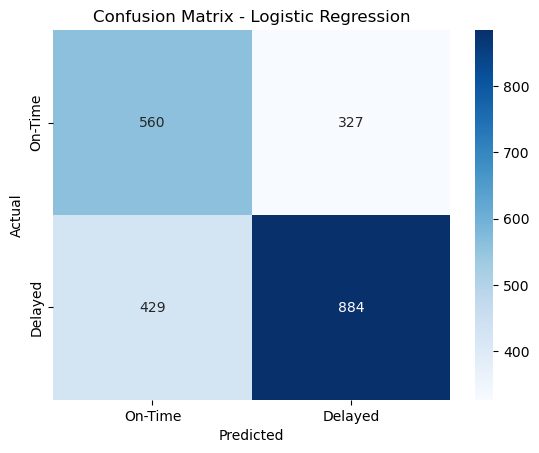

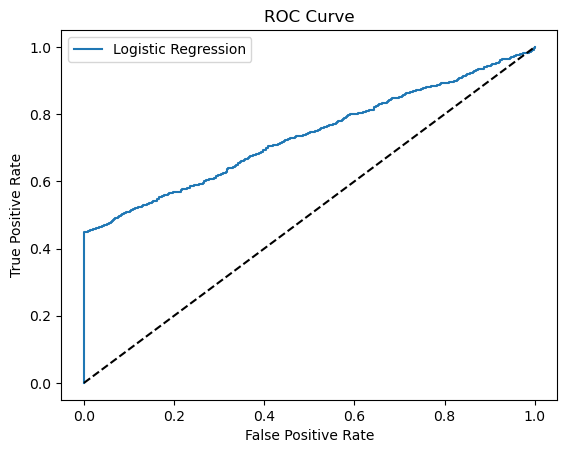

In [3]:
# built a Logistic Regression model to predict shipment delays.first preprocessed the data, split it into train and test sets, scaled the features, and trained the model.

# Then, I evaluated it using accuracy, precision, recall, F1, and ROC-AUC, and visualized the results with a confusion matrix and ROC curve to check how well it distinguishes delayed vs on-time shipments

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# 3. Define target (y) and features (X)
y = df["Reached.on.Time_Y.N"]   # target column
X = df.drop("Reached.on.Time_Y.N", axis=1)  # drop target from features

# 4. Handle categorical variables (Mode_of_Shipment, Product_importance, Gender)
X = pd.get_dummies(X, drop_first=True)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 8. Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 9. Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["On-Time", "Delayed"],
            yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 11. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()





In [9]:
# ------------------------Grid Search CV applied to Logistic Regression------------

# performs hyperparameter tuning for Logistic Regression using Grid Search CV. It tries different combinations of regularization strength, penalty, and solver, uses 5-fold CV with F1 scoring, and selects the best model.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],             # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']      # Solvers that support L1/L2
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',          
    cv=5,                 
    verbose=1,
    n_jobs=-1              
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.7051922237218559
Test Accuracy: 0.6554545454545454


In [10]:
# ----------solvers in logistic regression-----------------

# Liblinear  and Saga

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Define two models: one with liblinear, one with saga
log_liblinear = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', random_state=42)
log_saga = LogisticRegression(max_iter=1000, solver='saga', penalty='l2', random_state=42)

# Train both models
log_liblinear.fit(X_train_scaled, y_train)
log_saga.fit(X_train_scaled, y_train)

# Predictions
y_pred_lib = log_liblinear.predict(X_test_scaled)
y_pred_saga = log_saga.predict(X_test_scaled)

# Evaluate
print(" Liblinear Solver")
print("Accuracy:", accuracy_score(y_test, y_pred_lib))
print("F1 Score:", f1_score(y_test, y_pred_lib))

print("\n Saga Solver")
print("Accuracy:", accuracy_score(y_test, y_pred_saga))
print("F1 Score:", f1_score(y_test, y_pred_saga))


 Liblinear Solver
Accuracy: 0.6559090909090909
F1 Score: 0.6999603646452636

 Saga Solver
Accuracy: 0.6559090909090909
F1 Score: 0.6999603646452636


In [4]:
# This code trains a Logistic Regression model, identifies the key features that increase or decrease delay risk using odds ratios, and predicts the probability of delay for each shipment. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Target and features
y = df["Reached.on.Time_Y.N"]
X = df.drop("Reached.on.Time_Y.N", axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------------- Part A: Feature impact ----------------
coefs = model.coef_[0]
odds_ratios = np.exp(coefs)  # convert coefficients to odds ratios
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefs,
    "Odds_Ratio": odds_ratios
}).sort_values(by="Coefficient", ascending=False)

print(" Top features increasing delay risk:")
print(feature_importance.head(5)[["Feature", "Odds_Ratio"]])

print("\n Top features decreasing delay risk:")
print(feature_importance.tail(5)[["Feature", "Odds_Ratio"]])

# ---------------- Part B: Probabilities ----------------
# Predict probability of delay for test set
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Add probabilities into a small DataFrame
results = pd.DataFrame({
    "Predicted_Prob_Delay": y_proba,
    "Actual": y_test.reset_index(drop=True)
})

# Flag shipments with prob > 0.7 as High Risk
results["Risk_Flag"] = np.where(results["Predicted_Prob_Delay"] >= 0.7, "High", "Normal")

print("\n\n Example flagged shipments:")
print(results.head(10))


 Top features increasing delay risk:
              Feature  Odds_Ratio
5    Discount_offered    4.396298
9   Warehouse_block_D    1.036829
2     Customer_rating    1.030168
10  Warehouse_block_F    1.017222
7   Warehouse_block_B    1.015893

 Top features decreasing delay risk:
                      Feature  Odds_Ratio
1         Customer_care_calls    0.912382
13     Product_importance_low    0.889928
14  Product_importance_medium    0.877472
6               Weight_in_gms    0.721760
0                          ID    0.596755


 Example flagged shipments:
   Predicted_Prob_Delay  Actual Risk_Flag
0              0.997570       1      High
1              0.437210       1    Normal
2              0.376414       0    Normal
3              0.341489       0    Normal
4              0.272082       0    Normal
5              0.621093       1    Normal
6              0.599858       0    Normal
7              0.499107       1    Normal
8              0.377926       0    Normal
9              0.95

🔹 Baseline Logistic Regression
Accuracy: 0.6563636363636364
Precision: 0.7299752270850537
Recall: 0.6732673267326733
F1 Score: 0.7004754358161648
ROC-AUC: 0.7337525791430934


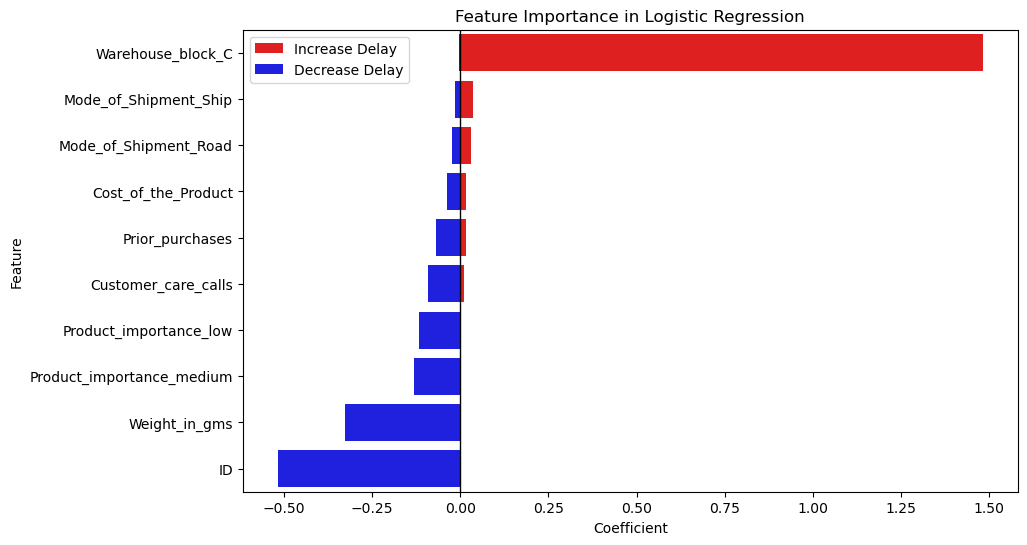

In [2]:
# This code trains a baseline Logistic Regression model to predict shipment delays, evaluates its performance using multiple metrics, and visualizes the most impactful features influencing delays using coefficients and odds ratios.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# ------------------- 2. Load Dataset -------------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Target and Features
y = df["Reached.on.Time_Y.N"]
X = df.drop("Reached.on.Time_Y.N", axis=1)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# ------------------- 3. Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------- 4. Feature Scaling -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------- 5. Baseline Logistic Regression -------------------
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

y_pred_base = baseline_model.predict(X_test_scaled)
y_proba_base = baseline_model.predict_proba(X_test_scaled)[:, 1]

print("🔹 Baseline Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Precision:", precision_score(y_test, y_pred_base))
print("Recall:", recall_score(y_test, y_pred_base))
print("F1 Score:", f1_score(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_base))

# ------------------- 6. Feature Importance (Coefficients & Odds Ratios) -------------------
coefs = baseline_model.coef_[0]
odds_ratios = np.exp(coefs)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefs,
    "Odds_Ratio": odds_ratios
}).sort_values(by="Coefficient", ascending=False)

# Plot top 10 increasing and decreasing risk features
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance.head(10), color="red", label="Increase Delay")
sns.barplot(x="Coefficient", y="Feature", data=feature_importance.tail(10), color="blue", label="Decrease Delay")
plt.axvline(0, color="black", linewidth=1)
plt.title("Feature Importance in Logistic Regression")
plt.legend()
plt.show()



Accuracy: 0.6454545454545455

Confusion Matrix:
 [[447 448]
 [332 973]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53       895
           1       0.68      0.75      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.65      0.64      2200



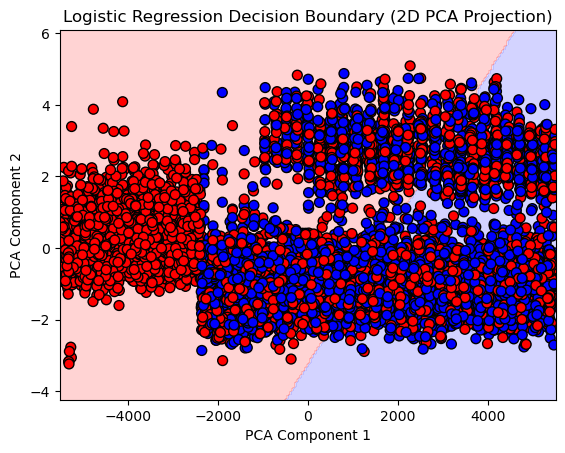

In [28]:
# It uses PCA to reduce dimensionality, trains a logistic regression model, evaluates its performance, and visualizes its decision boundary.


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
df.columns = df.columns.str.strip()  # remove extra spaces

# ---------------- Handle Missing Values ----------------
# Fill numerical missing values with mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical missing values with mode
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# ---------------- Encode Categorical Variables ----------------
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---------------- Feature Engineering ----------------
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / (df['Weight_in_gms'] + 1e-6)

# ---------------- Normalize Numerical Features ----------------
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Cost_to_Weight_Ratio']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ---------------- Define Features and Target ----------------
target_column = 'Reached.on.Time_Y.N'
X = df.drop(target_column, axis=1)
y = df[target_column]

# ---------------- Split into Train/Test ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- PCA for 2D Visualization ----------------
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# ---------------- Train Logistic Regression ----------------
logreg = LogisticRegression()
logreg.fit(X_train_2d, y_train)

# ---------------- Predictions ----------------
y_pred = logreg.predict(X_test_2d)

# ---------------- Evaluate ----------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- Plot Decision Boundary ----------------
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k', s=50)
plt.title("Logistic Regression Decision Boundary (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### SUPPORT VECTOR MACHINE(SVM)

In [4]:
#  This code trains an SVM with an RBF kernel on scaled shipment data to predict delays and evaluates its performance using accuracy and F1 score.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# SVM with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))


SVM Model
Accuracy: 0.6731818181818182
F1 Score: 0.6590801327643433


🔹 SVM Model Performance
Accuracy: 0.6731818181818182
Precision: 0.8731155778894473
Recall: 0.5293221629855294
F1 Score: 0.6590801327643433
ROC-AUC: 0.7373734685063338


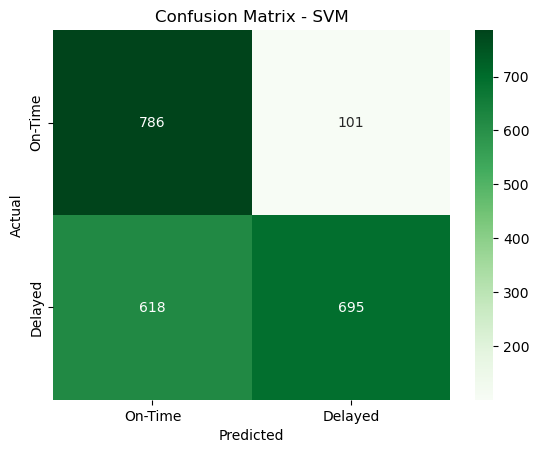

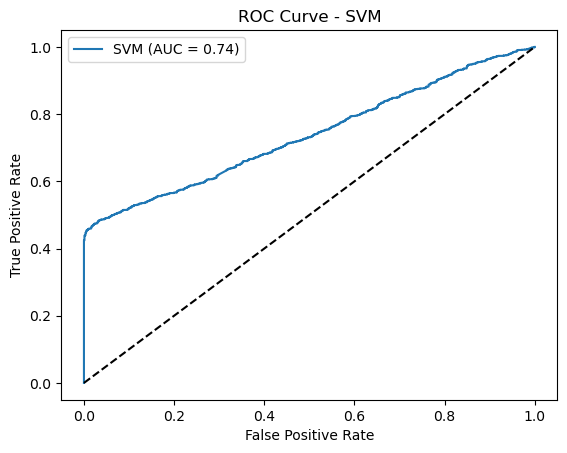

In [5]:
# This code trains an SVM with RBF kernel on scaled shipment data to classify delayed vs on-time deliveries. It evaluates performance using metrics like accuracy,Precision, Recall, F1, and ROC-AUC, and visualizes results using a confusion matrix and ROC curve.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Train Model ----------------
# SVM with RBF kernel (good default choice for non-linear data)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# ---------------- Predictions ----------------
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# ---------------- Evaluation ----------------
print("🔹 SVM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

# ---------------- Confusion Matrix ----------------
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["On-Time", "Delayed"],
            yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# ---------------- ROC Curve ----------------
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_svm)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


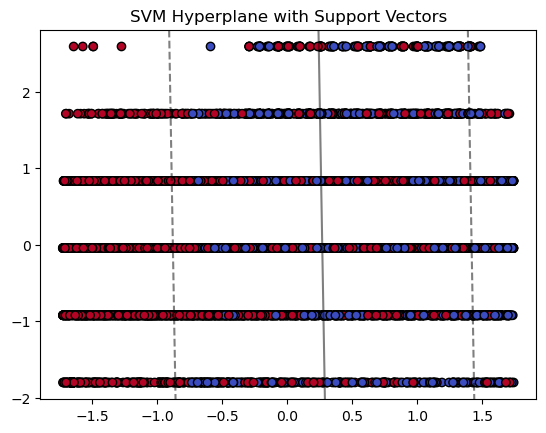

In [6]:
#  This code visually demonstrates how SVM finds the optimal hyperplane and margins to separate delayed and on-time shipments 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Use only 2 features for visualization
X_2d = X_train_scaled[:, :2]   # just first 2 features
y_2d = y_train

# Train SVM
svm_vis = SVC(kernel="linear")
svm_vis.fit(X_2d, y_2d)

# Plot points
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_2d, cmap='coolwarm', edgecolors='k')

# Plot hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_vis.decision_function(xy).reshape(XX.shape)

# Draw hyperplane and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

plt.title("SVM Hyperplane with Support Vectors")
plt.show()

# solid line -- decision boundary
# dashed lines -- margins. 

# Points on the margins are support vectors — these are the critical data points that define the hyperplane.

Accuracy: 0.6659090909090909

Confusion Matrix:
 [[687 208]
 [527 778]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.77      0.65       895
           1       0.79      0.60      0.68      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



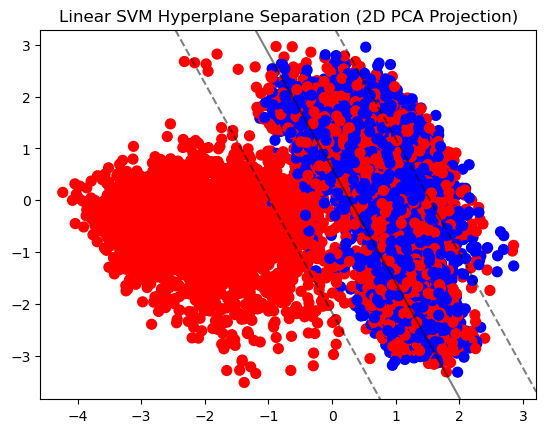

In [12]:
# This code trains a Linear SVM to predict whether a shipment will be on time or delayed.

#  It shows how SVM separates the classes in 2D space.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
df.columns = df.columns.str.strip()  # remove any spaces

# ---------------- Encode Categorical Columns ----------------
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---------------- Define Features and Target ----------------
target_column = 'Reached.on.Time_Y.N'  # correct target column
X = df.drop(target_column, axis=1)
y = df[target_column]

# ---------------- Split into Train and Test ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Feature Scaling ----------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------- Train Linear SVM ----------------
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# ---------------- Make Predictions ----------------
y_pred = svm_model.predict(X_test)

# ---------------- Evaluate Model ----------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- Visualize Hyperplane (2D using PCA) ----------------
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train)

svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_vis, y_train)

# Plot data points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap='bwr', s=50)

# Plot hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_vis.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

plt.title("Linear SVM Hyperplane Separation (2D PCA Projection)")
plt.show()


In [ ]:
#   ------- ROC CURVE : Logistic v/s SVM --------

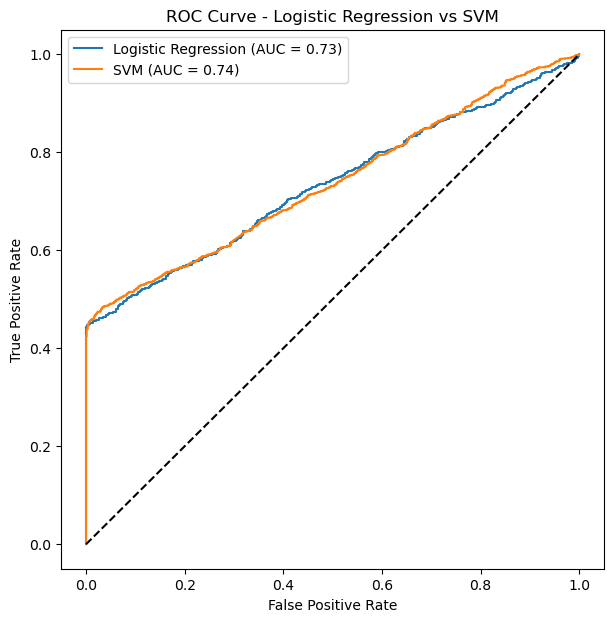

In [5]:
# ---------------- Import Libraries ----------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Logistic Regression ----------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# ---------------- SVM (with probability) ----------------
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# ---------------- ROC Curves ----------------
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(7,7))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_log)))
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_svm)))
plt.plot([0,1], [0,1], 'k--')  # Random baseline

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression vs SVM")
plt.legend()
plt.show()


###   NAIVE BAYES

In [29]:
# Evaluating accuracy, precision, recall, f1-score   and confusion metrics


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
df.columns = df.columns.str.strip()

# ---------------- Handle Missing Values ----------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# ---------------- Encode Categorical Variables ----------------
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---------------- Feature Engineering ----------------
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / (df['Weight_in_gms'] + 1e-6)

# ---------------- Normalize Numerical Features ----------------
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Cost_to_Weight_Ratio']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ---------------- Define Features and Target ----------------
target_column = 'Reached.on.Time_Y.N'
X = df.drop(target_column, axis=1)
y = df[target_column]

# ---------------- Split Dataset ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- Train Naive Bayes ----------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_pred = nb_model.predict(X_test)

# ---------------- Evaluate ----------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6936363636363636

Confusion Matrix:
 [[888   7]
 [667 638]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.99      0.72       895
           1       0.99      0.49      0.65      1305

    accuracy                           0.69      2200
   macro avg       0.78      0.74      0.69      2200
weighted avg       0.82      0.69      0.68      2200



Accuracy: 0.6595454545454545

Confusion Matrix:
 [[570 325]
 [424 881]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60       895
           1       0.73      0.68      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



C:\Users\HP\AppData\Local\Temp\ipykernel_944\4051442601.py:72: UserWarning: You passed a edgecolor/edgecolors ('yellow') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.bwr, edgecolors='yellow', marker='x', s=80, label='Test Points')


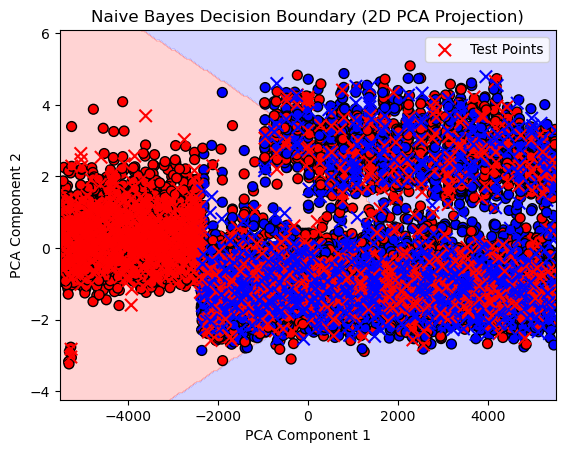

In [30]:
#  This code shows how Naive Bayes can classify shipments and how its decision boundary looks after PCA.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")
df.columns = df.columns.str.strip()

# ---------------- Handle Missing Values ----------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# ---------------- Encode Categorical Variables ----------------
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---------------- Feature Engineering ----------------
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / (df['Weight_in_gms'] + 1e-6)

# ---------------- Normalize Numerical Features ----------------
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Cost_to_Weight_Ratio']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ---------------- Define Features and Target ----------------
target_column = 'Reached.on.Time_Y.N'
X = df.drop(target_column, axis=1)
y = df[target_column]

# ---------------- Split Dataset ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- PCA for 2D Visualization ----------------
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# ---------------- Train Naive Bayes ----------------
nb_model = GaussianNB()
nb_model.fit(X_train_2d, y_train)

# ---------------- Predictions ----------------
y_pred = nb_model.predict(X_test_2d)

# ---------------- Evaluate ----------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- Plot Decision Boundary ----------------
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k', s=50)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.bwr, edgecolors='yellow', marker='x', s=80, label='Test Points')
plt.title("Naive Bayes Decision Boundary (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


###  RANDOM FOREST

🔹 Random Forest Performance
Accuracy: 0.6581818181818182
F1 Score: 0.6738941890719862
ROC-AUC: 0.7376417938385635


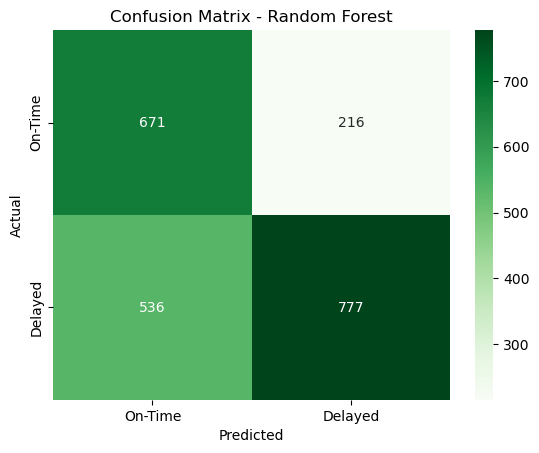

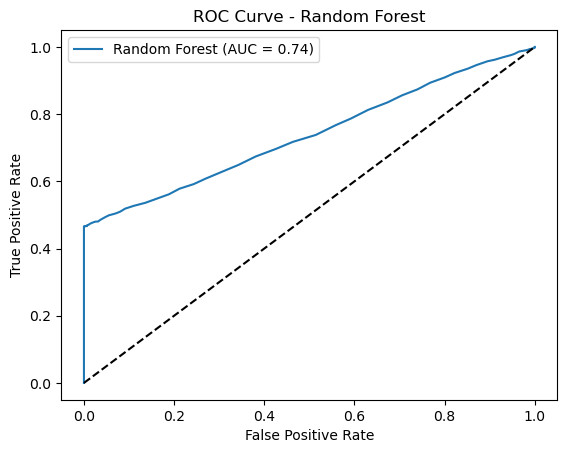

In [3]:
# I used Random Forest to predict shipment delays. It handles complex relationships well and reduces overfitting.
# I evaluated it using accuracy, F1 score, ROC-AUC, and visualized performance through a confusion matrix and ROC curve

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# ---------------- Train-Test Split ----------------
# Assuming df is already loaded
y = df["Reached.on.Time_Y.N"]
X = df.drop("Reached.on.Time_Y.N", axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Random Forest ----------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["On-Time", "Delayed"],
            yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


###   DECISION TREES

🔹 Decision Tree Performance
Accuracy: 0.68
Precision: 0.9967373572593801
Recall: 0.46534653465346537
F1 Score: 0.6344755970924195
ROC-AUC: 0.7318584169578175


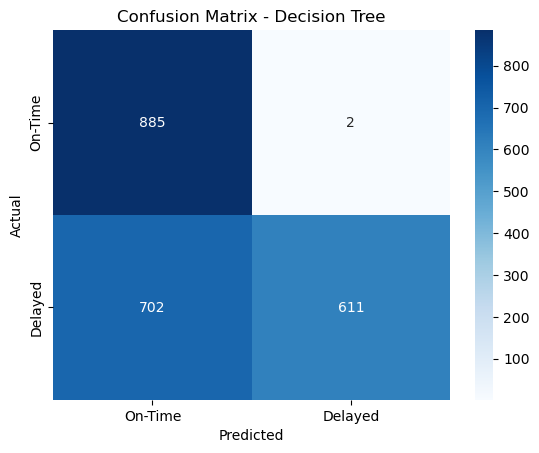

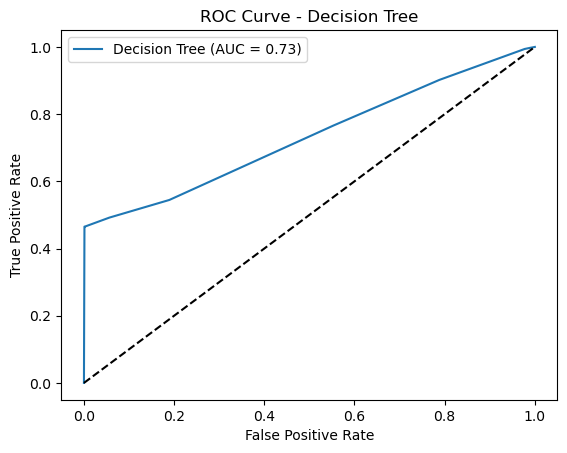

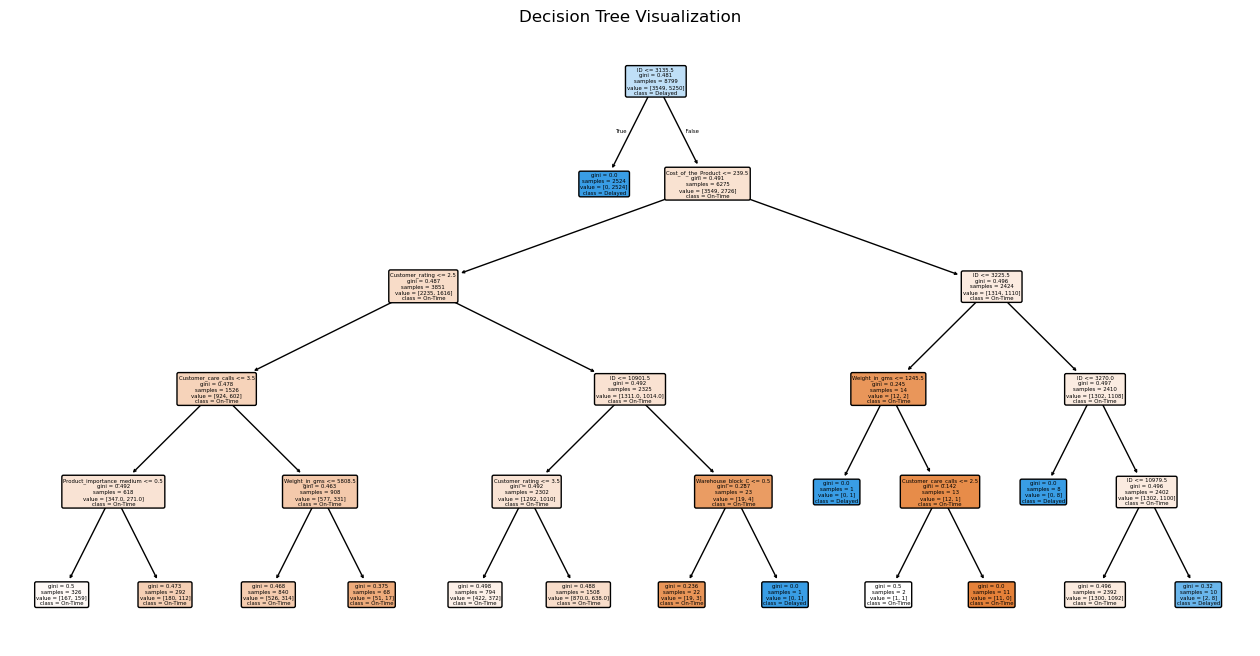

In [4]:
# evaluated it using accuracy, precision, recall, F1, and ROC-AUC, and plotted the decision tree to show how it makes predictions.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Load Dataset ----------------
# Replace path with your dataset location
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# ---------------- Feature & Target Split ----------------
X = df.drop("Reached.on.Time_Y.N", axis=1)   # features
y = df["Reached.on.Time_Y.N"]                # target

# One-hot encode categorical features (if not already done)
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Train Decision Tree ----------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # limit depth to avoid overfitting
dt_model.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# ---------------- Evaluation ----------------
print("🔹 Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))

# ---------------- Confusion Matrix ----------------
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["On-Time", "Delayed"],
            yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ---------------- ROC Curve ----------------
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_dt)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# ---------------- Visualize Tree ----------------
plt.figure(figsize=(16,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["On-Time", "Delayed"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [2]:
#  Evaluating accuracy, precision, recall, F1, and ROC-AUC among d/f ML models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Feature Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Define Models ----------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ---------------- Train & Evaluate ----------------
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM (RBF Kernel)", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    else:  # Tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# ---------------- Create Comparison Table ----------------
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.656364   0.729975  0.673267  0.700475  0.733753
1     SVM (RBF Kernel)  0.673182   0.873116  0.529322  0.659080  0.737373
2        Decision Tree  0.645455   0.699925  0.710586  0.705215  0.629814
3          Naive Bayes  0.678636   0.976415  0.472963  0.637250  0.735687
4        Random Forest  0.658182   0.782477  0.591775  0.673894  0.737642


###  Comparing ROC_AUC curve 

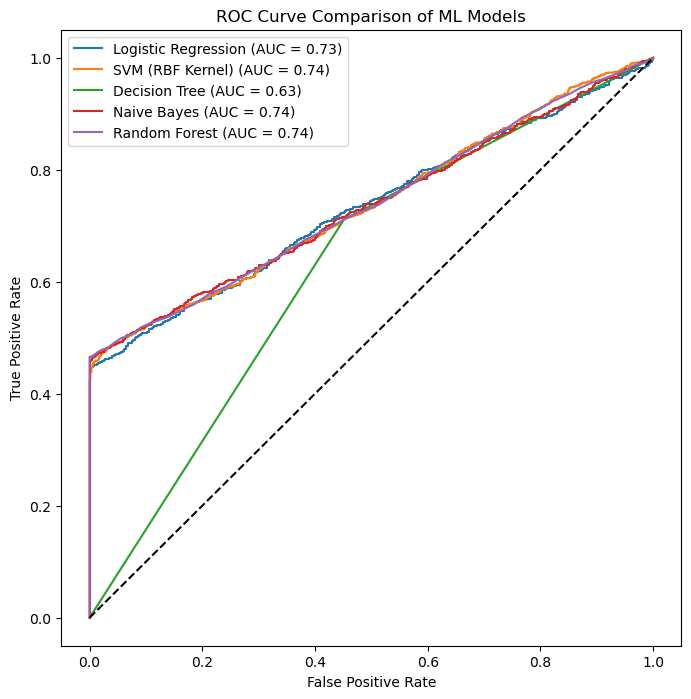

In [6]:
# ---------------- Import Libraries ----------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Define Models ----------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ---------------- Plot ROC Curves ----------------
plt.figure(figsize=(8,8))

for name, model in models.items():
    if name in ["Logistic Regression", "SVM (RBF Kernel)", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:  # Trees don't need scaling
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Random baseline
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of ML Models")
plt.legend()
plt.show()


In [ ]:
#   ------optuna--------

In [1]:
!pip install optuna


  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/7f/12/cba81286cbaf0f0c3f0473846cfd992cb240bdcea816bf2ef7de8ed0f744/optuna-4.5.0-py3-none-any.whl.metadata
  Using cached optuna-4.5.0-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/39/4a/4c61d4c84cfd9befb6fa08a702535b27b21fff08c946bc2f6139decbf7f7/alembic-1.16.5-py3-none-any.whl.metadata
  Using cached alembic-1.16.5-py3-none-any.whl.metadata (7.3 kB)
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/87/fb/99f81ac72ae23375f22b7afdb7642aba97c00a713c217124420147681a2f/mako-1.3.10-py3-none-any.whl.metadata
  Using ca

In [3]:
# ---------------- Import Libraries ----------------
import pandas as pd
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = pd.get_dummies(df.drop("Reached.on.Time_Y.N", axis=1), drop_first=True)
y = df["Reached.on.Time_Y.N"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Define Optuna Objective Function ----------------
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Cross-validation for stable F1 score
    f1 = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring=make_scorer(f1_score)
    ).mean()

    return f1

# ---------------- Run Optuna Optimization ----------------
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=30)   # try 30 combinations

print(" Best Parameters:", study.best_params)
print(" Best F1 Score:", study.best_value)


[I 2025-10-03 19:09:04,467] A new study created in memory with name: no-name-cd09ea5f-6570-4ae6-a192-8970b6672de0
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:06] WARNING: C:\actions-runner\_work\xg

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-03 19:09:20,902] Trial 5 finished with value: 0.6931414999412271 and parameters: {'n_estimators': 257, 'learning_rate': 0.06790539682592432, 'max_depth': 7, 'subsample': 0.7962072844310213, 'colsample_bytree': 0.523225206359998

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-03 19:09:32,794] Trial 10 finished with value: 0.7014545946522543 and parameters: {'n_estimators': 177, 'learning_rate': 0.2804874321792964, 'max_depth': 10, 'subsample': 0.5148027085118481, 'colsample_bytree': 0.8259332753890892}. Best is trial 10 with value: 0.7014545946522543.
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are n

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-03 19:10:08,540] Trial 21 finished with value: 0.6996443920466751 and parameters: {'n_estimators': 153, 'learning_rate': 0.20189316300589755, 'max_depth': 9, 'subsample': 0.5033323261736682, 'colsample_bytree': 0.78847458694483

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-10-03 19:10:25,012] Trial 26 finished with value: 0.6980858289753211 and parameters: {'n_estimators': 208, 'learning_rate': 0.21652155140521648, 'max_depth': 10, 'subsample': 0.7155597611314855, 'colsample_bytree': 0.6794411435320924}. Best is trial 20 with value: 0.701540144454137.
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are n

 Best Parameters: {'n_estimators': 153, 'learning_rate': 0.19646673581350613, 'max_depth': 9, 'subsample': 0.5123379010730953, 'colsample_bytree': 0.7945490393825292}
 Best F1 Score: 0.701540144454137


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Tuned XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       887
           1       0.72      0.67      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.65      0.65      2200

ROC-AUC Score: 0.7385987493034274


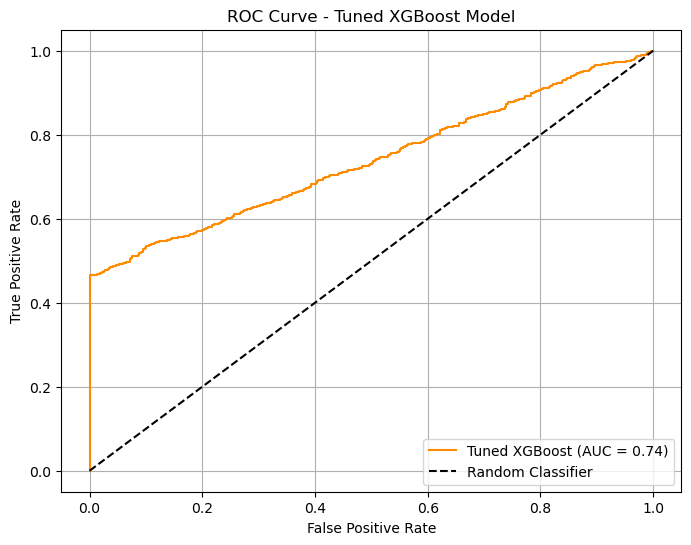

In [7]:
# I used Optuna to automatically tune XGBoost hyperparameters
# evaluated it using classification metrics and ROC-AUC

# ---------------- Train Final Tuned Model ----------------
best_params = study.best_params

best_xgb = xgb.XGBClassifier(
    **best_params,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

best_xgb.fit(X_train, y_train)

# ---------------- Evaluation ----------------
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("\n Tuned XGBoost Model Performance")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ---------------- ROC Curve Plot ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Tuned XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='darkorange')
plt.plot([0,1], [0,1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#  ---------------ADA boost ---------------------------------------

# I used AdaBoost with decision stumps as base learners. AdaBoost builds a sequence of simple models, each focusing on mistakes made by the previous one, and combines them to make a strong predictor

🔹 AdaBoost with Decision Stumps Performance
Accuracy: 0.6809090909090909
Precision: 1.0
Recall: 0.46534653465346537
F1 Score: 0.6351351351351351
ROC-AUC: 0.7326732673267327


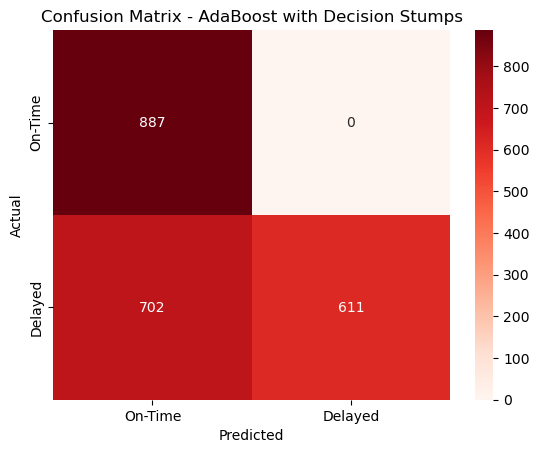

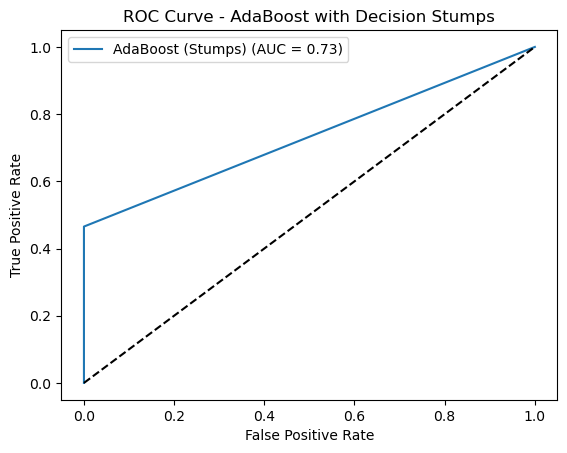

In [8]:
# evaluated it using multiple metrics and visualized the confusion matrix and ROC curve

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Base Learner: Decision Stump ----------------
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# ---------------- AdaBoost with Stumps ----------------
ada_stump = AdaBoostClassifier(
    estimator=stump,        # ✅ updated parameter name
    n_estimators=100,       # number of stumps to combine
    learning_rate=0.1,      # controls how much each stump contributes
    random_state=42
)

ada_stump.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_pred_ada = ada_stump.predict(X_test)
y_proba_ada = ada_stump.predict_proba(X_test)[:, 1]

# ---------------- Evaluation ----------------
print("🔹 AdaBoost with Decision Stumps Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ada))

# ---------------- Confusion Matrix ----------------
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["On-Time", "Delayed"],
            yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost with Decision Stumps")
plt.show()

# ---------------- ROC Curve ----------------
fpr, tpr, _ = roc_curve(y_test, y_proba_ada)
plt.plot(fpr, tpr, label="AdaBoost (Stumps) (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_ada)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Stumps")
plt.legend()
plt.show()


In [3]:
#  It shows the accuracy of Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Base learner (weak model)
base_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Bagging with 50 trees
bagging_model = BaggingClassifier(
    estimator=base_dt, n_estimators=50, random_state=42
)
bagging_model.fit(X_train, y_train)

# Predictions
y_pred_bag = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Bagging Accuracy: 0.6795454545454546


In [4]:
# Accuracy of Random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.6581818181818182


In [ ]:
!pip install xgboost


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 Model Performance Comparison (All Models)
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.656364   0.729975  0.673267  0.700475  0.733753
SVM (RBF Kernel)     0.673182   0.873116  0.529322  0.659080  0.737373
Naive Bayes          0.678636   0.976415  0.472963  0.637250  0.735687
Decision Tree        0.645455   0.699925  0.710586  0.705215  0.629814
Random Forest        0.661364   0.788618  0.591013  0.675664  0.740527
Gradient Boosting    0.675000   0.868227  0.536938  0.663529  0.746016
XGBoost              0.650909   0.726894  0.664890  0.694511  0.736644


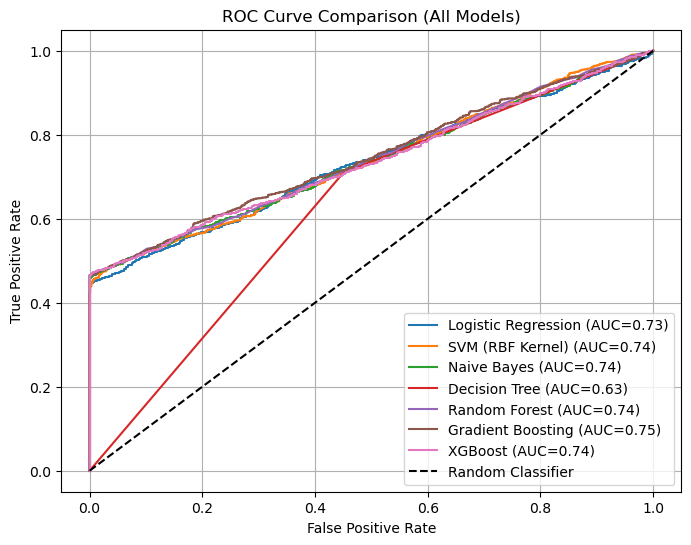

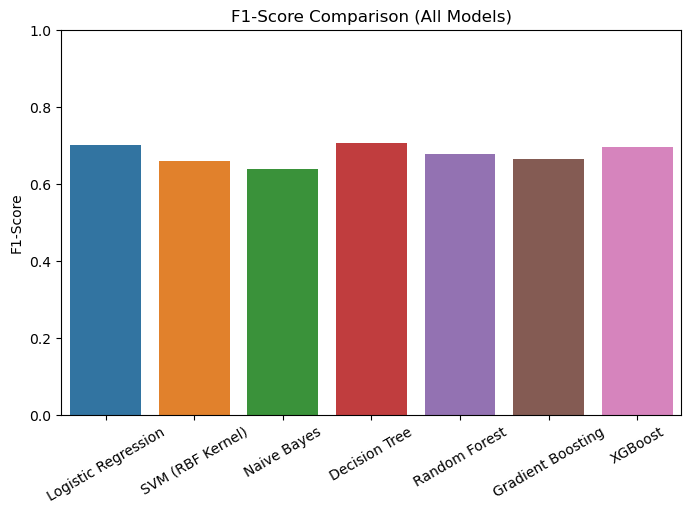

In [1]:
# compared multiple ML models like Logistic Regression, SVM, Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, and XGBoost on the shipment dataset

# evaluated them using accuracy, precision, recall, F1, and ROC-AUC, and visualized their ROC curves and F1 scores. This helps identify the most suitable model for predicting shipment delays


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# ---------------------------- Load Dataset ----------------------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features and Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# ---------------------------- Train-Test Split ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------- Define Models ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        use_label_encoder=False, eval_metric='logloss', 
        n_estimators=200, random_state=42
    )
}

# ---------------------------- Train, Predict, Evaluate ----------------------------
results = {}
roc_curves = {}

for name, model in models.items():
    if name in ["Logistic Regression", "SVM (RBF Kernel)", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:  # Tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
    }

    # Store ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr, results[name]["ROC-AUC"])

# ---------------------------- Summary Table ----------------------------
summary_df = pd.DataFrame(results).T
print("\n🔹 Model Performance Comparison (All Models)")
print(summary_df)

# ---------------------------- ROC Curve Plot ----------------------------
plt.figure(figsize=(8,6))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (All Models)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ---------------------------- Barplot for F1-Score ----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=summary_df.index, y=summary_df["F1-Score"])
plt.title("F1-Score Comparison (All Models)")
plt.ylabel("F1-Score")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()


In [ ]:
#  --------------------SHAP ----------------------

In [6]:
# ---------------- Train All Models ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# SVM (RBF)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

# AdaBoost
from sklearn.tree import DecisionTreeClassifier
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(estimator=stump, n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)

# XGBoost (using tuned params if available, else default)
best_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
best_xgb.fit(X_train, y_train)

print(" All models are trained and ready for SHAP explanations.")


 All models are trained and ready for SHAP explanations.


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###   -------BOOSTING TECHNIQUES-----------

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 AdaBoost vs Gradient Boosting vs XGBoost Performance Comparison
                   Accuracy  Precision    Recall  F1-Score   ROC-AUC
AdaBoost           0.680909   1.000000  0.465347  0.635135  0.732673
Gradient Boosting  0.675000   0.868227  0.536938  0.663529  0.746016
XGBoost            0.670000   0.789733  0.609292  0.687876  0.735587


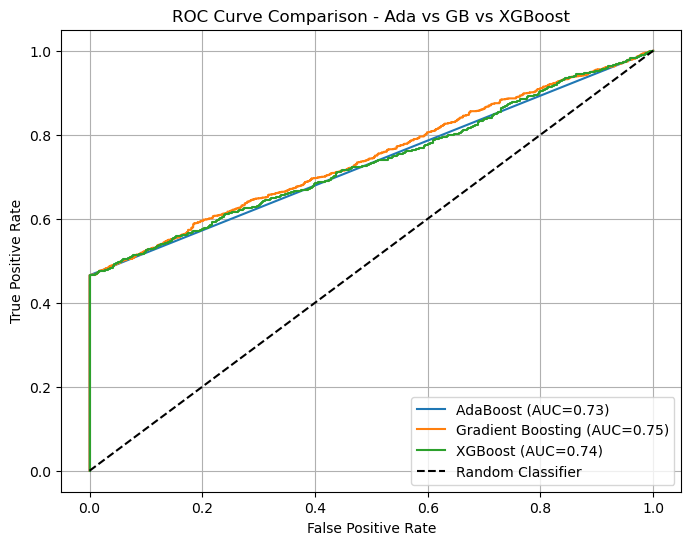

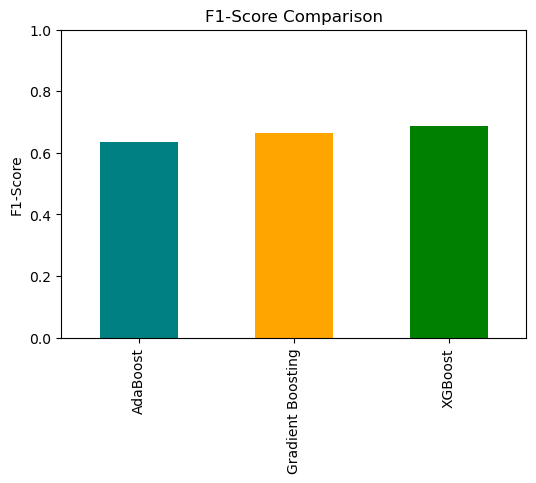

In [2]:
#  compared three boosting algorithms — AdaBoost, Gradient Boosting, and XGBoost

# evaluated them using accuracy, precision, recall, F1-score, and ROC-AUC, and visualized their ROC curves and F1 scores


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import xgboost as xgb

# ---------------- Load Dataset ----------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Features & Target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Define Models ----------------
# AdaBoost with Decision Stump
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(estimator=stump, n_estimators=100, learning_rate=0.1, random_state=42)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5,
                              random_state=42, eval_metric='logloss', use_label_encoder=False)

models = {
    "AdaBoost": ada,
    "Gradient Boosting": gb,
    "XGBoost": xgb_model
}

# ---------------- Train & Evaluate ----------------
results = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    
    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr, results[name]["ROC-AUC"])

# ---------------- Create Results Table ----------------
summary = pd.DataFrame(results).T
print("\n🔹 AdaBoost vs Gradient Boosting vs XGBoost Performance Comparison")
print(summary)

# ---------------- ROC Curve Plot ----------------
plt.figure(figsize=(8,6))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Ada vs GB vs XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ---------------- Barplot for F1-Scores ----------------
plt.figure(figsize=(6,4))
summary["F1-Score"].plot(kind="bar", color=["teal","orange","green"])
plt.title("F1-Score Comparison")
plt.ylabel("F1-Score")
plt.ylim(0,1)
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Tuned XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       887
           1       0.76      0.63      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200

ROC-AUC Score: 0.7348670952430427


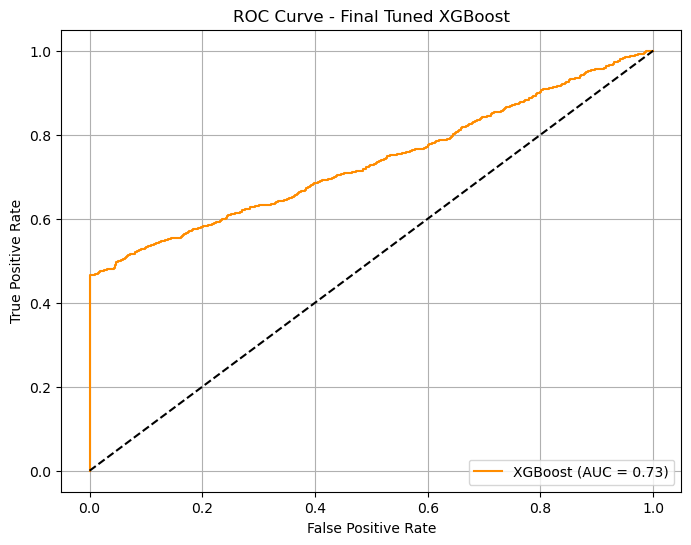

 Model saved as final_xgboost_model.pkl


In [10]:
# ------------------ 1. Import Libraries ------------------
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# ------------------ 2. Load & Prepare Data ------------------
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Split target & features
y = df["Reached.on.Time_Y.N"]
X = df.drop("Reached.on.Time_Y.N", axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ 3. Best Parameters from Optuna ------------------
best_params = {
    "n_estimators": 300,
    "learning_rate": 0.1,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8
    # Add other best params from your Optuna run here
}

# ------------------ 4. Train Final XGBoost Model ------------------
best_xgb = xgb.XGBClassifier(
    **best_params,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
best_xgb.fit(X_train, y_train)

# ------------------ 5. Evaluate Model ------------------
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print("🔹 Tuned XGBoost Model Performance")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ------------------ 6. ROC Curve ------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Tuned XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ------------------ 7. Save Model for Deployment ------------------
joblib.dump(best_xgb, "final_xgboost_model.pkl")
print(" Model saved as final_xgboost_model.pkl")


##   ------- SHAP ----------

###  SHAP (SHapley Additive exPlanations)

In [3]:
import sys
!{sys.executable} -m pip install shap


In [1]:
import shap
print("✅ SHAP version:", shap.__version__)


✅ SHAP version: 0.48.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Train.csv")

# Separate features and target
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

# Convert categorical variables to numeric (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
import shap

# Initialize SHAP TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)


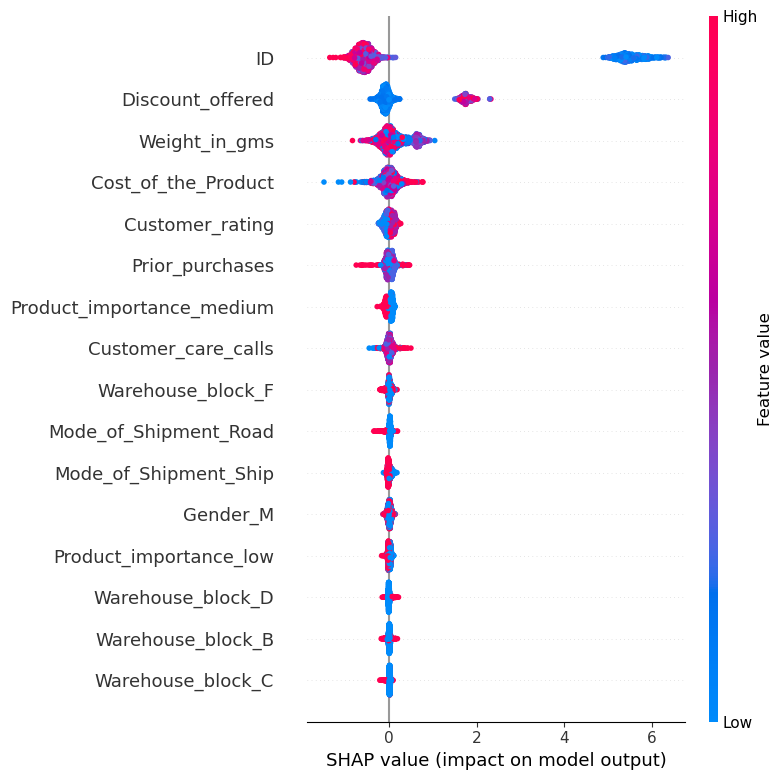

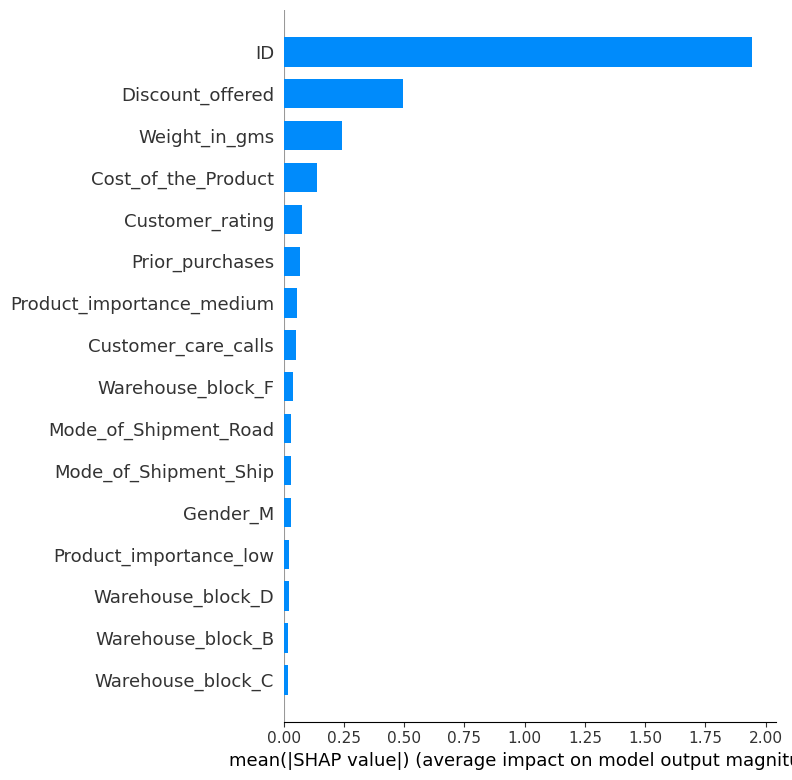

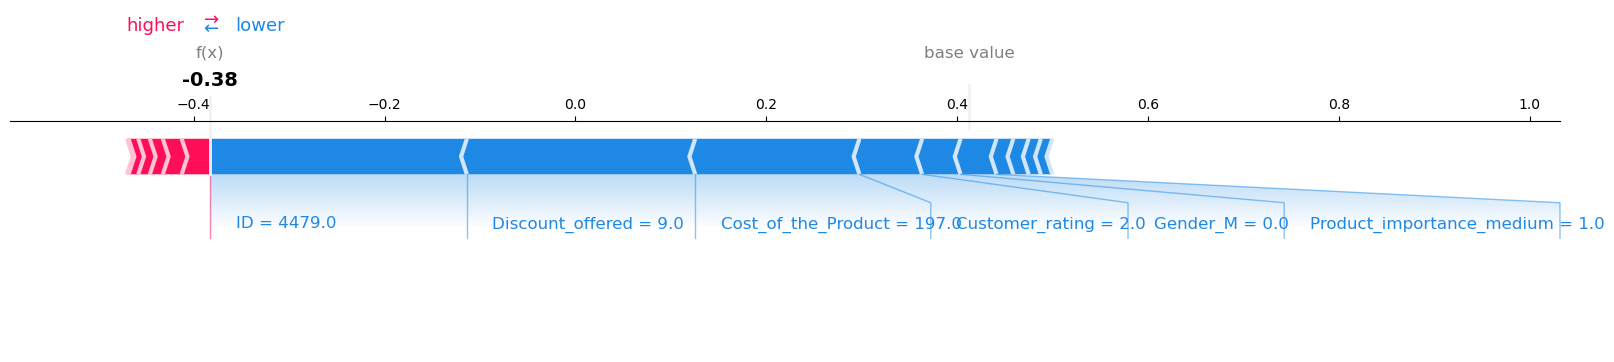

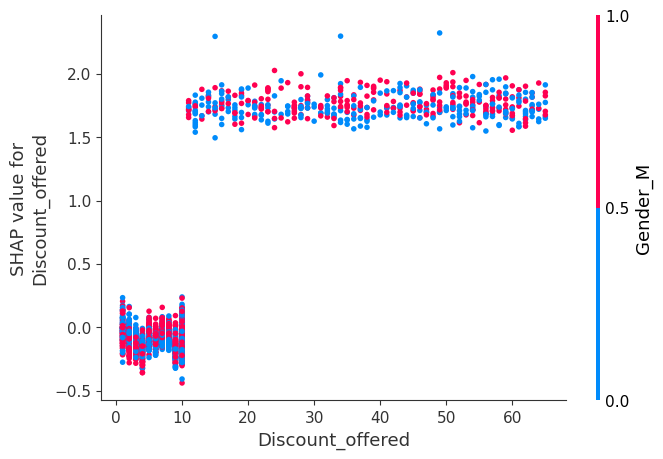

In [8]:

# SHAP Explainability for XGBoost Model

import shap
import matplotlib.pyplot as plt

#  Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(best_xgb)

#  Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

#  Summary Plot
#  Shows which features are most important overall
# -------------------------------
shap.summary_plot(shap_values, X_test)

# Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

sample_index = 5

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index],
    X_test.iloc[sample_index],
    matplotlib=True
)

# Dependence Plot — Effect of a Single Feature
# Example: 'Discount_offered' is usually a top factor
# -------------------------------
if 'Discount_offered' in X_test.columns:
    shap.dependence_plot('Discount_offered', shap_values, X_test)
